In [7]:
import pandas as pd
import json
df = pd.read_csv('../data/year_2023.csv')
print(df.head())




C:\Users\User\AppData\Local\Temp\ipykernel_10496\2257455960.py:3: DtypeWarning: Columns (630) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/year_2023.csv')


       name  essround  edition    proddate   idno cntry   dweight   pspwght  \
0  ESS11e02        11      2.0  20.11.2024  50014    AT  1.185115  0.392891   
1  ESS11e02        11      2.0  20.11.2024  50030    AT  0.609898  0.325153   
2  ESS11e02        11      2.0  20.11.2024  50057    AT  1.392330  4.000023   
3  ESS11e02        11      2.0  20.11.2024  50106    AT  0.556061  0.176228   
4  ESS11e02        11      2.0  20.11.2024  50145    AT  0.722795  1.060940   

    pweight  anweight  ...  rinwe                inwde                jinws  \
0  0.330915  0.130013  ...    NaN  2023-11-12 15:26:55  2023-11-12 15:21:28   
1  0.330915  0.107598  ...    NaN  2023-10-18 10:44:18  2023-10-18 10:42:22   
2  0.330915  1.323666  ...    NaN  2023-09-30 14:13:33  2023-09-30 14:08:31   
3  0.330915  0.058316  ...    NaN  2023-06-30 15:11:21  2023-06-30 15:08:05   
4  0.330915  0.351080  ...    NaN  2023-07-11 11:14:03  2023-07-11 11:10:02   

                 jinwe  inwtm  mode  domain      p

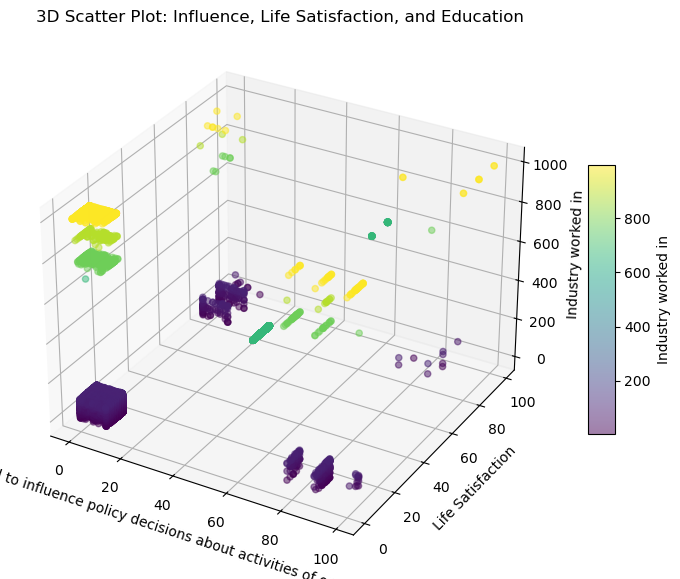

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Define the three axes
x = df['iorgact']  # X-axis
y = df['stflife']  # Y-axis
z = df['nacer2']   # Z-axis (e.g., years of education)

# Plot the points
scatter = ax.scatter(x, y, z, alpha=0.5, c=z, cmap='viridis')

# Add labels and title
ax.set_xlabel("Allowed to influence policy decisions about activities of organisation")
ax.set_ylabel("Life Satisfaction")
ax.set_zlabel("Industry worked in")
ax.set_title("3D Scatter Plot: Influence, Life Satisfaction, and Education")

# Add a color bar for the Z-axis
cbar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=10)
cbar.set_label("Industry worked in")

# Show the plot
plt.show()

In [ ]:
import statsmodels.api as sm

for country in df["cntry"].unique():
    df_sub = df[df["cntry"] == country]
    X = df_sub[["hinctnta", "uempla", "trstlgl", "happy"]].dropna()
    y = df_sub.loc[X.index, "stflife"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    print(f"Country: {country}")
    print(model.summary())
    print("\n" + "="*50 + "\n")


In [69]:
df_sweden = df[df["cntry"] == "SE"]  # Filter for Sweden
df_sweden["post_policy"] = (df_sweden["essround"] >= 2012).astype(int)  # Policy change in 2012

model = sm.OLS(df_sweden["stflife"], sm.add_constant(df_sweden[["post_policy", "hinctnta", "uempla", "trstgov"]])).fit()
print(model.summary())


C:\Users\User\AppData\Local\Temp\ipykernel_5172\927451085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sweden["post_policy"] = (df_sweden["essround"] >= 2012).astype(int)  # Policy change in 2012


KeyError: "['trstgov'] not in index"

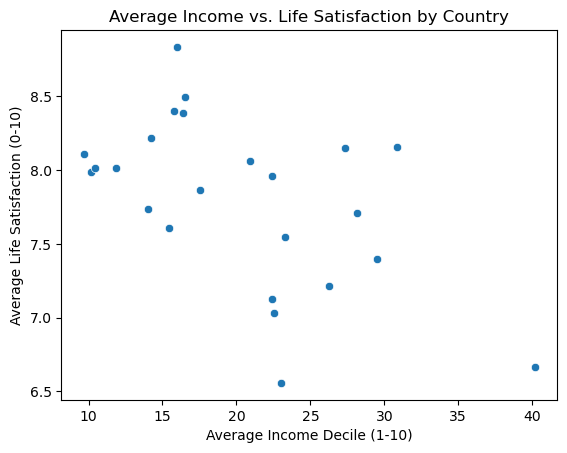

In [73]:
import seaborn as sns

# Scatterplot for income vs. life satisfaction
sns.scatterplot(x=df.groupby("cntry")["hinctnta"].mean(), 
                y=df.groupby("cntry")["stflife"].mean())

plt.title("Average Income vs. Life Satisfaction by Country")
plt.xlabel("Average Income Decile (1-10)")
plt.ylabel("Average Life Satisfaction (0-10)")
plt.show()


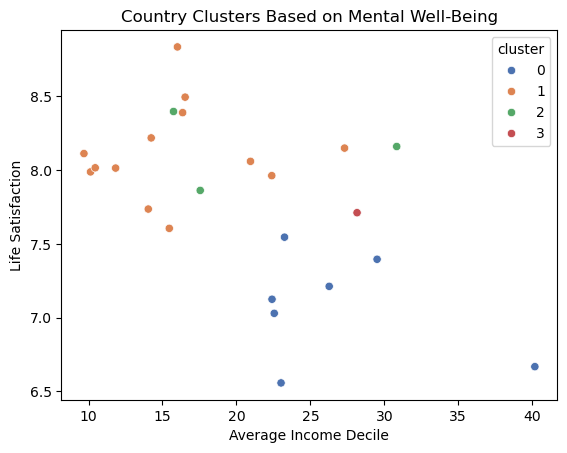

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select country-level features
df_cluster = df.groupby("cntry")[["stflife", "hinctnta", "uempla", "trstlgl"]].mean()

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(scaled_features)

# Visualize clusters
sns.scatterplot(x=df_cluster["hinctnta"], y=df_cluster["stflife"], hue=df_cluster["cluster"], palette="deep")
plt.title("Country Clusters Based on Mental Well-Being")
plt.xlabel("Average Income Decile")
plt.ylabel("Life Satisfaction")
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load your dataset
df = pd.read_csv('ESS_data.csv')

# Convert necessary variables to categorical if they are not in the correct format
df['country'] = df['country'].astype('category')
df['gender'] = df['gender'].astype('category')
df['education'] = df['education'].astype('category')

# Model with confounding factors
model1 = smf.ols('happiness ~ income + C(education) + age + C(country) + C(gender)', data=df)
results1 = model1.fit()
print("Model with Confounding Factors:\n", results1.summary())

# Model with interaction effects
model2 = smf.ols('happiness ~ income * C(education) + age + C(country) + C(gender)', data=df)
results2 = model2.fit()
print("Model with Interaction Effect:\n", results2.summary())

# Expanded model including additional variables
model3 = smf.ols('happiness ~ income * C(education) + age + C(country) + C(gender) + loneliness + social_support', data=df)
results3 = model3.fit()
print("Expanded Model:\n", results3.summary())


In [75]:
df_country["residual"] = df_country["stflife"] - df_country["hinctnta"]
df_country = df_country.sort_values(by="residual")

print("Countries where life satisfaction is HIGHER than expected:")
print(df_country.tail(5))  # Top 5 happiest "overachievers"

print("\nCountries where life satisfaction is LOWER than expected:")
print(df_country.head(5))  # Bottom 5 "underachievers"


NameError: name 'df_country' is not defined

In [2]:
df['stflife'].value_counts()  # Example for income


stflife
8.0     11040
7.0      7386
9.0      6240
10.0     4048
5.0      3704
6.0      3656
4.0      1431
3.0      1157
2.0       630
0.0       347
1.0       224
Name: count, dtype: int64

In [2]:
df = df[df['stflife'].between(0, 10)]

df['stflife'].value_counts()  # Check response distribution



stflife
8     11040
7      7386
9      6240
10     4048
5      3704
6      3656
4      1431
3      1157
2       630
0       347
1       224
Name: count, dtype: int64

In [77]:
from scipy.stats import pearsonr

# Drop NaN values from both columns simultaneously
df_cleaned = df[['hincfel', 'stflife']].dropna()

# Pearson correlation test
corr, p_value = pearsonr(df_cleaned["hincfel"], df_cleaned["stflife"])

print(f"Correlation: {corr}, P-value: {p_value}")

Correlation: -0.021746017184390783, P-value: 1.3122294844401614e-05


In [ ]:
from scipy.stats import ttest_ind

employed = df[df["uempla"] == 0]["stflife"].dropna()
unemployed = df[df["uempla"] == 1]["stflife"].dropna()

t_stat, p_value = ttest_ind(employed, unemployed)
print(f"T-Test P-value: {p_value}")



T-Test P-value: 2.2142843274072195e-53


In [13]:
anova_result = f_oneway(
    df[df["uempla"] == 0]["stflife"].dropna(),  # Employed
    df[df["uempla"] == 1]["stflife"].dropna()
)

print(f"ANOVA P-value: {anova_result.pvalue}")


ANOVA P-value: 2.2142843274280147e-53


In [16]:
import statsmodels.api as sm

# Drop NaN values from both columns simultaneously
df_cleaned = df[['eisced', 'stflife']].dropna()

# Separate the independent and dependent variables
X = df_cleaned['eisced']
y = df_cleaned['stflife']

# Add intercept
X = sm.add_constant(X)

# Regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     810.8
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          1.50e-176
Time:                        13:35:08   Log-Likelihood:                -83436.
No. Observations:               39607   AIC:                         1.669e+05
Df Residuals:                   39605   BIC:                         1.669e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5812      0.025    267.858      0.0

In [35]:
import statsmodels.api as sm

# Selecting relevant variables
X = df[["hinctnta", "uempla", "fltlnl", "eisced", "trstlgl"]].dropna()
y = df.loc[X.index, "stflife"]

# Adding a constant (intercept)
X = sm.add_constant(X)

# Running regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     1393.
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:18:27   Log-Likelihood:                -61755.
No. Observations:               30876   AIC:                         1.235e+05
Df Residuals:                   30870   BIC:                         1.236e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8748      0.044    155.330      0.0

In [39]:
import statsmodels.api as sm

# Selecting relevant variables
X = df[["hinctnta", "uempla", "fltlnl", "eisced", "trstlgl", "nwspol", "trstplt", "netusoft", "sclmeet"]].dropna()
y = df.loc[X.index, "stflife"]

# Adding a constant (intercept)
X = sm.add_constant(X)

# Running regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     864.5
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:25:59   Log-Likelihood:                -60300.
No. Observations:               30384   AIC:                         1.206e+05
Df Residuals:                   30374   BIC:                         1.207e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0909      0.058    105.152      0.0

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["cntry"], y=df["stflife"])
plt.xticks(rotation=90)
plt.title("Life Satisfaction Across Countries")
plt.xlabel("Country")
plt.ylabel("Life Satisfaction (0-10)")
plt.show()


KeyError: 'cntry'

<Figure size 1200x600 with 0 Axes>

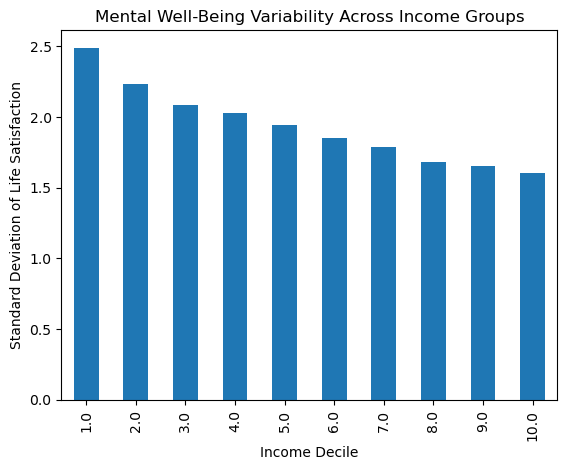

In [41]:
import numpy as np

df.groupby("hinctnta")["stflife"].agg(["mean", "std"]).plot(kind="bar", y="std", legend=False)
plt.title("Mental Well-Being Variability Across Income Groups")
plt.ylabel("Standard Deviation of Life Satisfaction")
plt.xlabel("Income Decile")
plt.show()


In [42]:
from scipy.stats import levene

low_income = df[df["hinctnta"] <= 3]["stflife"].dropna()
high_income = df[df["hinctnta"] >= 8]["stflife"].dropna()

stat, p_value = levene(low_income, high_income)
print(f"Levene’s Test P-value: {p_value}")


Levene’s Test P-value: 6.217697402281207e-204


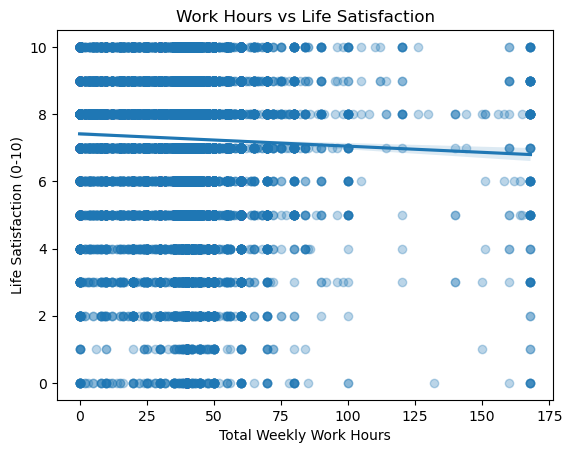

In [43]:
sns.regplot(x=df["wkhtot"], y=df["stflife"], scatter_kws={"alpha":0.3})
plt.title("Work Hours vs Life Satisfaction")
plt.xlabel("Total Weekly Work Hours")
plt.ylabel("Life Satisfaction (0-10)")
plt.show()


In [44]:
X = df[["wkhtot", "stfjobs", "jbsec"]].dropna()
y = df.loc[X.index, "stflife"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


KeyError: "['stfjobs', 'jbsec'] not in index"

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select variables
features = ["hinctnta", "uempla", "eisced", "trstlgl", "nwspol",  "health"]
df = df.dropna(subset=features + ["stflife"])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[features], df["stflife"], test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions & accuracy
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 4.125947693147886


In [47]:
import pandas as pd
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

    Feature  Importance
4    nwspol    0.293452
3   trstlgl    0.187002
0  hinctnta    0.185172
2    eisced    0.184910
5    health    0.132587
1    uempla    0.016877


In [52]:
df["income_x_age"] = df["hinctnta"] * df["age_group"]  # Creating an interaction variable

X = df[["hinctnta", "agea", "income_x_age", "uempla", "trstlgl"]].dropna()
y = df.loc[X.index, "stflife"]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                stflife   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     764.1
Date:                Mon, 24 Mar 2025   Prob (F-statistic):               0.00
Time:                        15:18:13   Log-Likelihood:                -62486.
No. Observations:               30608   AIC:                         1.250e+05
Df Residuals:                   30602   BIC:                         1.250e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            5.5058      0.075     73.769   

C:\Users\User\AppData\Local\Temp\ipykernel_5172\4127025644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["income_x_age"] = df["hinctnta"] * df["age_group"]  # Creating an interaction variable


C:\Users\User\AppData\Local\Temp\ipykernel_5172\2359260832.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["cluster"] = clusters


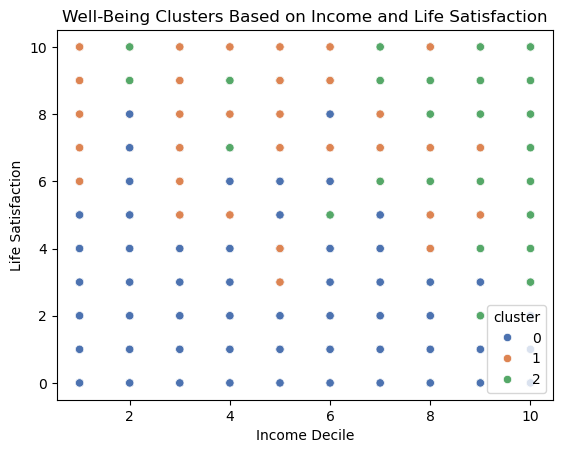

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select key variables for clustering and drop rows with NaN values
features = df[["hinctnta", "uempla", "eisced", "fltlnl", "trstlgl", "stflife"]].dropna()

# Scale data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the original DataFrame (only the rows without NaN values)
df_cleaned = df.dropna(subset=["hinctnta", "uempla", "eisced", "fltlnl", "trstlgl", "stflife"])
df_cleaned["cluster"] = clusters

# Visualise clusters
sns.scatterplot(x=df_cleaned["hinctnta"], y=df_cleaned["stflife"], hue=df_cleaned["cluster"], palette="deep")
plt.title("Well-Being Clusters Based on Income and Life Satisfaction")
plt.xlabel("Income Decile")
plt.ylabel("Life Satisfaction")
plt.show()

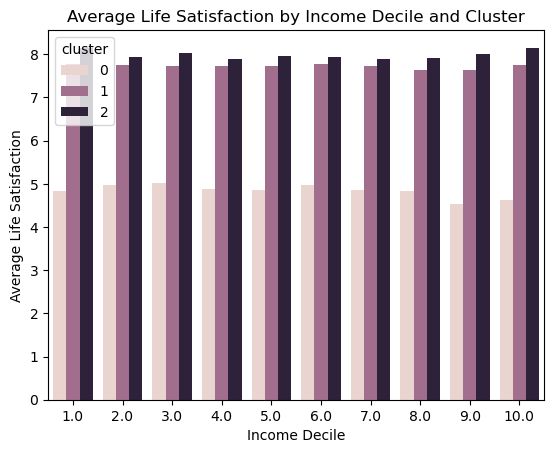

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean life satisfaction per decile and cluster
mean_stflife = df_cleaned.groupby(['hinctnta', 'cluster'])['stflife'].mean().reset_index()

sns.barplot(x="hinctnta", y="stflife", hue="cluster", data=mean_stflife)
plt.title("Average Life Satisfaction by Income Decile and Cluster")
plt.xlabel("Income Decile")
plt.ylabel("Average Life Satisfaction")
plt.show()

In [59]:
import statsmodels.formula.api as smf

df["post_crisis"] = (df["essround"] >= 2012).astype(int)  # Assume crisis happened in 2012

model = smf.ols("stflife ~ post_crisis * hinctnta + uempla + trstgov", data=df).fit()
print(model.summary())


KeyError: 'essround'

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Simulating 5% decrease in unemployment
df.loc[:, "uempla_simulated"] = df["uempla"].apply(lambda x: max(x - 0.05, 0))

# Prepare the data for prediction
X_sim = df[["hinctnta", "uempla_simulated", "trstlgl"]].dropna()

# Ensure the indices are aligned
X_sim = sm.add_constant(X_sim)
y_sim = model.predict(X_sim)

# Add the predicted life satisfaction to the DataFrame
df.loc[X_sim.index, "stflife_predicted"] = y_sim

# Plot the predicted life satisfaction
sns.histplot(df["stflife_predicted"].dropna(), bins=10, kde=True)
plt.title("Predicted Life Satisfaction After Policy Intervention")
plt.xlabel("Predicted Life Satisfaction (0-10)")
plt.ylabel("Frequency")
plt.show()

ValueError: shapes (30730,4) and (6,) not aligned: 4 (dim 1) != 6 (dim 0)

In [61]:
from statsmodels.tsa.arima.model import ARIMA

df_time = df.groupby("essround")["stflife"].mean()  # Average well-being per survey year
model = ARIMA(df_time, order=(2, 1, 2))  # Auto-regressive model
fit_model = model.fit()
future_forecast = fit_model.forecast(steps=5)  # Predict next 5 years

plt.plot(df_time, label="Observed")
plt.plot(future_forecast, label="Forecast", linestyle="dashed")
plt.title("Predicted Life Satisfaction Over Time")
plt.legend()
plt.show()


KeyError: 'essround'

In [63]:
df["resilience_score"] = df["stflife"] - (df["hinctnta"] + df["uempla"] + df["health"])
df_resilient = df[df["resilience_score"] > df["resilience_score"].quantile(0.75)]  # Top 25% most resilient

df_resilient


,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,...,imptrada,impfuna,respc19a,symtc19,symtnc19,education_group,age_group,income_x_age,uempla_simulated,resilience_score
1,9.0,1.0,10.0,7.0,2.0,14.0,0.0,6.0,21.0,4.0,...,4.0,2.0,1.0,2.0,NaN,3.0,1.0,1.0,0.0,6.0
2,10.0,5.0,6.0,4.0,1.0,16.0,0.0,NaN,53.0,8.0,...,3.0,2.0,1.0,2.0,NaN,3.0,3.0,15.0,0.0,4.0
6,8.0,3.0,7.0,4.0,2.0,8.0,0.0,5.0,77.0,8.0,...,3.0,4.0,3.0,NaN,NaN,1.0,5.0,15.0,0.0,3.0
9,8.0,3.0,3.0,3.0,2.0,9.0,0.0,NaN,75.0,10.0,...,3.0,4.0,3.0,NaN,NaN,1.0,5.0,15.0,0.0,3.0
15,9.0,5.0,3.0,6.0,1.0,11.0,0.0,6.0,67.0,7.0,...,NaN,1.0,3.0,NaN,NaN,2.0,4.0,20.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,9.0,2.0,7.0,4.0,2.0,18.0,0.0,5.0,63.0,9.0,...,3.0,2.0,1.0,1.0,1.0,4.0,4.0,8.0,0.0,5.0
39798,9.0,1.0,4.0,7.0,3.0,13.0,0.0,5.0,70.0,10.0,...,1.0,4.0,3.0,NaN,NaN,2.0,4.0,4.0,0.0,5.0
39815,10.0,1.0,7.0,2.0,3.0,12.0,0.0,6.0,66.0,4.0,...,2.0,4.0,1.0,1.0,1.0,2.0,4.0,4.0,0.0,6.0
39849,7.0,1.0,4.0,4.0,2.0,9.0,0.0,5.0,70.0,5.0,...,1.0,3.0,1.0,1.0,2.0,1.0,4.0,4.0,0.0,4.0


In [66]:
from econml.dml import CausalForestDML

X = df[["hinctnta", "uempla"]]
y = df["stflife"]

model = CausalForestDML(model_t=RandomForestRegressor(), model_y=RandomForestRegressor())
model.fit(y, X)

df["predicted_stflife"] = model.effect(X)


ModuleNotFoundError: No module named 'econml'

In [ ]:
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianModel

hc = HillClimbSearch(df[["stflife", "hinctnta", "uempla", "trstgov", "lonely"]])
best_model = hc.estimate(scoring_method=BicScore(df))

print(best_model.edges())  # View causal relationships


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define model
model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary risk prediction
])

# Compile and train
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
from aequitas.group import Group

g = Group()
df_audit = g.get_crosstabs(df, attributes=["gender", "hinctnta"])
df_audit[["attribute_name", "fpr_disparity", "fnr_disparity"]]


In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df[["stflife", "trstgov", "lonely"]])

df["culture_factor"] = fa.transform(df[["stflife", "trstgov", "lonely"]])[:, 0]


In [ ]:
df.groupby("essround")["stflife"].mean().plot(kind="line", marker="o")
plt.title("Life Satisfaction Trends Over Time")
plt.ylabel("Mean Life Satisfaction")
plt.xlabel("Survey Year")
plt.show()


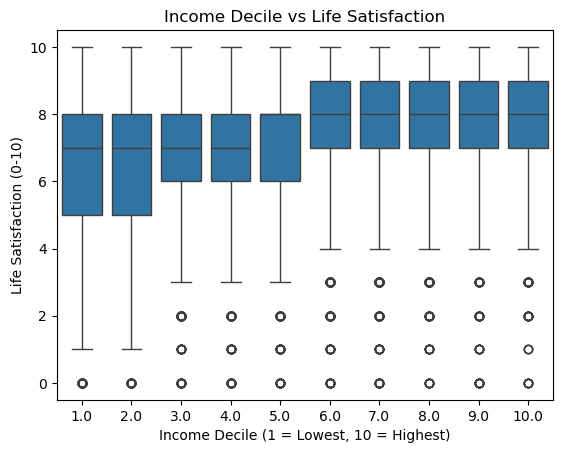

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df["hinctnta"], y=df["stflife"])
plt.title("Income Decile vs Life Satisfaction")
plt.xlabel("Income Decile (1 = Lowest, 10 = Highest)")
plt.ylabel("Life Satisfaction (0-10)")
plt.show()


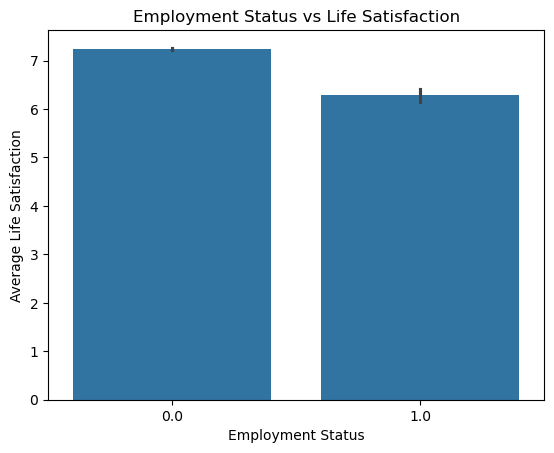

In [19]:
sns.barplot(x=df["uempla"], y=df["stflife"], estimator=lambda x: x.mean())
plt.title("Employment Status vs Life Satisfaction")
plt.xlabel("Employment Status")
plt.ylabel("Average Life Satisfaction")
plt.show()


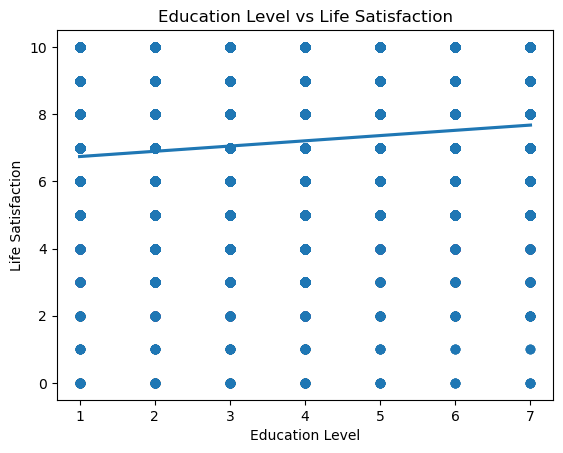

In [23]:
import statsmodels.api as sm

df_cleaned = df[['eisced', 'stflife']].dropna()
X = df_cleaned["eisced"].dropna()
y = df_cleaned["stflife"].dropna()
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

sns.regplot(x=df_cleaned["eisced"], y=df_cleaned["stflife"], scatter_kws={"alpha":0.3})
plt.title("Education Level vs Life Satisfaction")
plt.xlabel("Education Level")
plt.ylabel("Life Satisfaction")
plt.show()


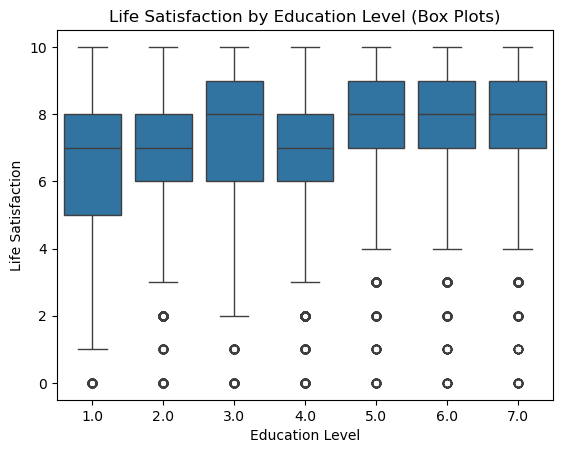

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="eisced", y="stflife", data=df)
plt.title("Life Satisfaction by Education Level (Box Plots)")
plt.xlabel("Education Level")
plt.ylabel("Life Satisfaction")
plt.show()

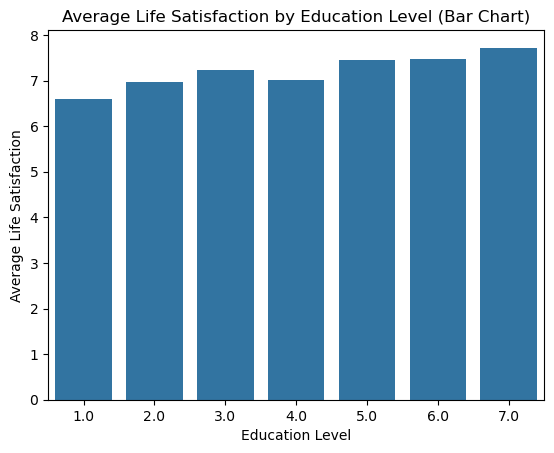

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average life satisfaction for each education level
average_satisfaction = df.groupby("eisced")["stflife"].mean()

sns.barplot(x=average_satisfaction.index, y=average_satisfaction.values)
plt.title("Average Life Satisfaction by Education Level (Bar Chart)")
plt.xlabel("Education Level")
plt.ylabel("Average Life Satisfaction")
plt.show()

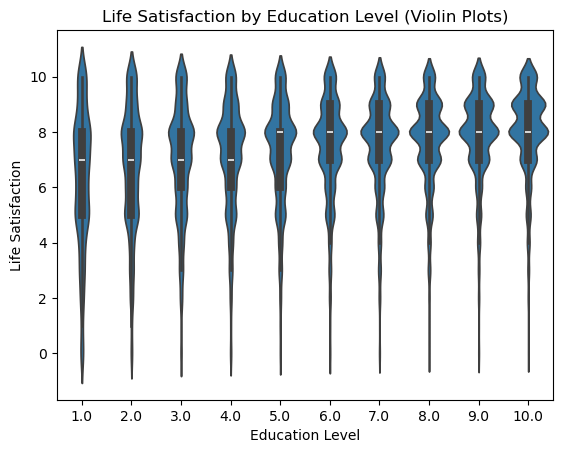

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x="hinctnta", y="stflife", data=df)
plt.title("Life Satisfaction by Education Level (Violin Plots)")
plt.xlabel("Education Level")
plt.ylabel("Life Satisfaction")
plt.show()

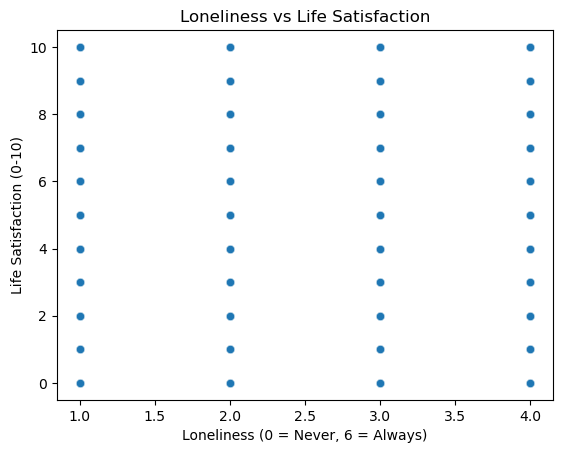

In [32]:
sns.scatterplot(x=df["fltlnl"], y=df["stflife"], alpha=0.5)
plt.title("Loneliness vs Life Satisfaction")
plt.xlabel("Loneliness (0 = Never, 6 = Always)")
plt.ylabel("Life Satisfaction (0-10)")
plt.show()


ValueError: x and y must have the same length.

In [16]:
df['hinctnta'].value_counts()


hinctnta
7     3631
6     3605
4     3474
8     3467
5     3417
3     3332
2     2961
9     2742
10    2740
1     2182
Name: count, dtype: int64

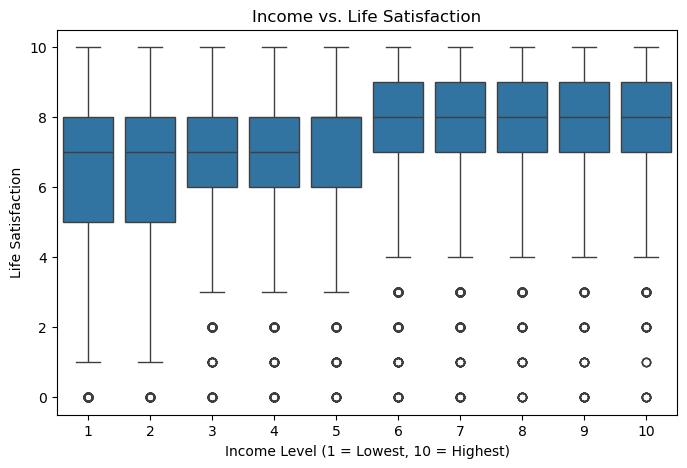

Correlation between Income and Life Satisfaction: 0.220


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a temporary filtered copy for analysis
filtered_df_income = df[df['hinctnta'].between(1, 10)].copy()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=filtered_df_income['hinctnta'], y=filtered_df_income['stflife'])
plt.xlabel("Income Level (1 = Lowest, 10 = Highest)")
plt.ylabel("Life Satisfaction")
plt.title("Income vs. Life Satisfaction")
plt.show()

# Correlation
correlation_income = filtered_df_income[['hinctnta', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Income and Life Satisfaction: {correlation_income:.3f}")


  - Higher income levels **slightly** increase life satisfaction, but the effect is **not strong**.(median doesnt increase)  
  - Satisfaction scores **remain spread out across all income levels**, meaning income **alone does not determine well-being**.  
  - Some **low-income people are satisfied, and some high-income people are dissatisfied**.  
- **Correlation:** **0.22** (Weak positive relationship).  
- **Conclusion:** Income **affects life satisfaction**, but other factors may have a **stronger impact**.  

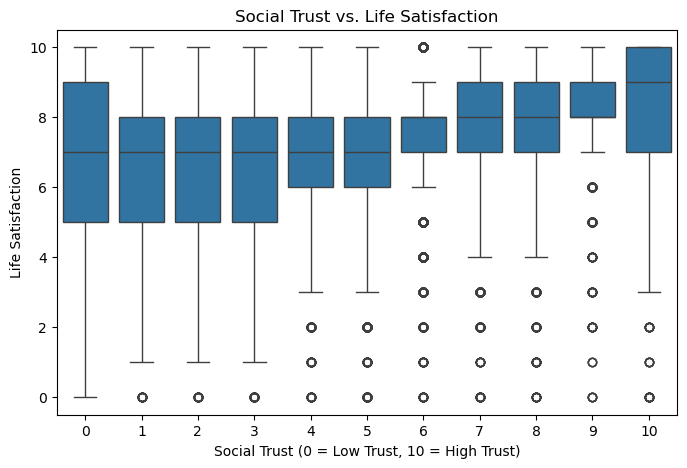

Correlation between Social Trust and Life Satisfaction: 0.248


In [33]:
filtered_df_trust = df[df['ppltrst'].between(0, 10)].copy()

plt.figure(figsize=(8,5))
sns.boxplot(x=filtered_df_trust['ppltrst'], y=filtered_df_trust['stflife'])
plt.xlabel("Social Trust (0 = Low Trust, 10 = High Trust)")
plt.ylabel("Life Satisfaction")
plt.title("Social Trust vs. Life Satisfaction")
plt.show()

correlation_trust = filtered_df_trust[['ppltrst', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Social Trust and Life Satisfaction: {correlation_trust:.3f}")


  - Higher trust levels correlate with **higher median life satisfaction**.  
  - Low-trust individuals have **more variation in satisfaction** (some are very happy, some very dissatisfied).  
  - High-trust individuals tend to be **more consistently satisfied**.  
- **Correlation:** **0.248** (Slightly stronger than income).  
- **Conclusion:** Trust appears to be **more strongly associated** with life satisfaction than income, but it’s still a **weak-moderate** relationship.  

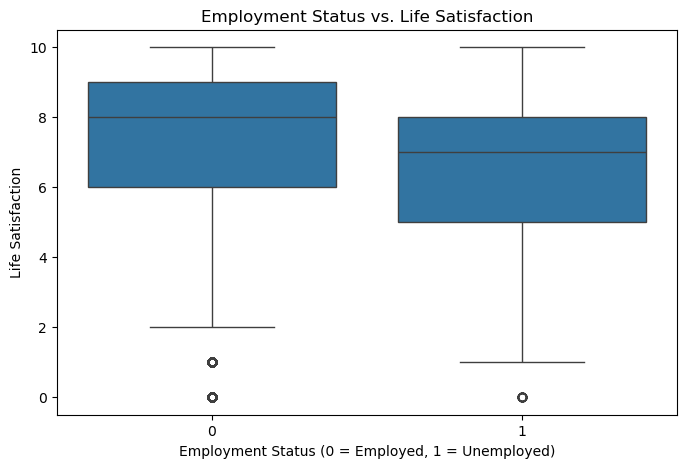

Correlation between Employment Status and Life Satisfaction: -0.077


In [41]:
# Create a temporary filtered copy for analysis
df['uempla'].value_counts()
filtered_df_employment = df[df['uempla'].between(0, 1)].copy()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=filtered_df_employment['uempla'], y=filtered_df_employment['stflife'])
plt.xlabel("Employment Status (0 = Employed, 1 = Unemployed)")
plt.ylabel("Life Satisfaction")
plt.title("Employment Status vs. Life Satisfaction")
plt.show()

correlation_employment = filtered_df_employment[['uempla', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Employment Status and Life Satisfaction: {correlation_employment:.3f}")



Boxplot Interpretation:

- Employed individuals (0) have higher median life satisfaction compared to unemployed individuals (1).

- Unemployed individuals have a wider spread of satisfaction, meaning some are highly satisfied, but many are lower than the median.

- There are some outliers (very dissatisfied people in both groups), but overall, employment appears to provide slight stability in satisfaction.

- Correlation: -0.077 (Weak negative relationship).

- Conclusion: Being unemployed is slightly associated with lower life satisfaction, but the effect is weak. Many other factors (e.g., social support, financial security) likely play a larger role.



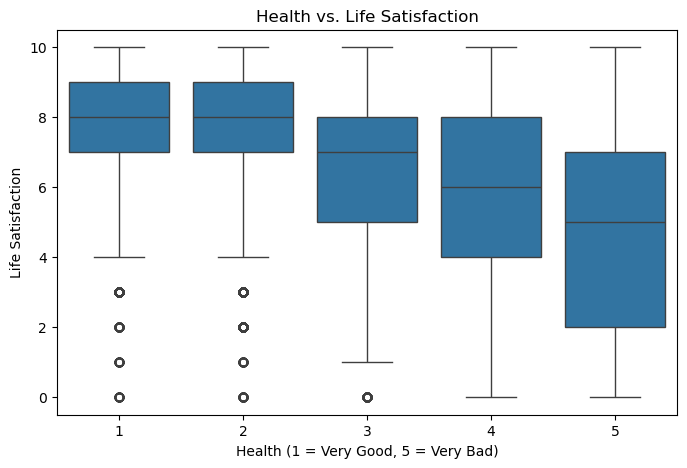

In [38]:
filtered_df_health = df[df['health'].between(1, 5)].copy()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=filtered_df_health['health'], y=filtered_df_health['stflife'])
plt.xlabel("Health (1 = Very Good, 5 = Very Bad)")
plt.ylabel("Life Satisfaction")
plt.title("Health vs. Life Satisfaction")
plt.show()

In [39]:
correlation_health = filtered_df_health[['health', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Health and Life Satisfaction: {correlation_health:.3f}")


Correlation between Health and Life Satisfaction: -0.288


- Worse health (4-5) is strongly linked to lower median life satisfaction.

- Poor health groups have a wider spread, meaning satisfaction varies more among unhealthy individuals.

- Some outliers exist—people in bad health can still report high satisfaction, likely due to other life factors.

- Correlation: -0.288 (Strongest negative correlation so far).

Conclusion: Health is the strongest associated with life satisfaction among the tested factors. Poor health reduces well-being more significantly than income, employment, or social trust.

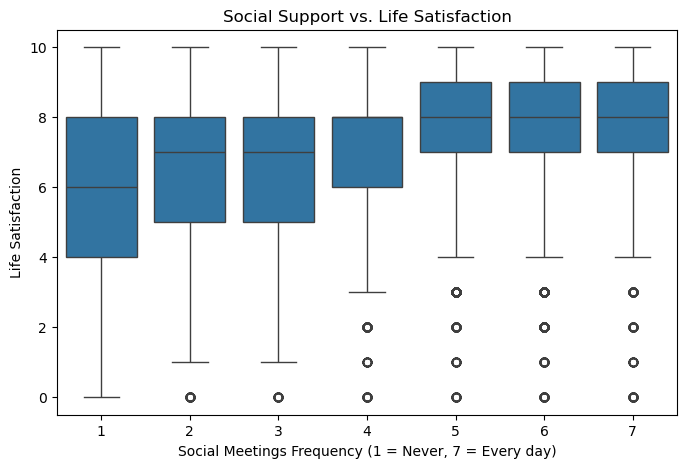

Correlation between Social Support and Life Satisfaction: 0.196


In [43]:
df['sclmeet'].value_counts()
# Create a temporary filtered dataset (without modifying df)
filtered_df_social = df[df['sclmeet'].between(1, 7)].copy()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=filtered_df_social['sclmeet'], y=filtered_df_social['stflife'])
plt.xlabel("Social Meetings Frequency (1 = Never, 7 = Every day)")
plt.ylabel("Life Satisfaction")
plt.title("Social Support vs. Life Satisfaction")
plt.show()

correlation_social = filtered_df_social[['sclmeet', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Social Support and Life Satisfaction: {correlation_social:.3f}")



- Higher social meeting frequency correlates with higher median life satisfaction.

- People who socialize rarely (1-2) have more variation in life satisfaction, meaning some are happy, but many are dissatisfied.

- Frequent socializers (6-7) have higher and more stable satisfaction levels.
- Correlation: 0.196 (Weaker than social trust but stronger than employment).

- Conclusion: Socializing more often is positively associated with life satisfaction, but its effect is weaker than health and trust.

In [68]:
df_clean

,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,...,ipadvnta,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19
0,8.0,6.0,5.0,4.0,3.0,12.0,0.0,NaN,65.0,10.0,...,5.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN
1,9.0,1.0,10.0,7.0,2.0,14.0,0.0,6.0,21.0,4.0,...,4.0,2.0,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN
2,10.0,5.0,6.0,4.0,1.0,16.0,0.0,NaN,53.0,8.0,...,4.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN
3,7.0,2.0,6.0,6.0,3.0,14.0,0.0,4.0,78.0,9.0,...,4.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN
4,9.0,NaN,6.0,5.0,2.0,12.0,0.0,NaN,64.0,8.0,...,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,5.0,5.0,5.0,6.0,2.0,NaN,0.0,6.0,18.0,10.0,...,3.0,3.0,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN
40152,10.0,7.0,7.0,4.0,2.0,14.0,0.0,NaN,56.0,10.0,...,3.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN
40153,10.0,10.0,5.0,6.0,2.0,17.0,0.0,NaN,31.0,5.0,...,5.0,3.0,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN
40154,8.0,NaN,0.0,7.0,1.0,8.0,0.0,6.0,15.0,2.0,...,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN


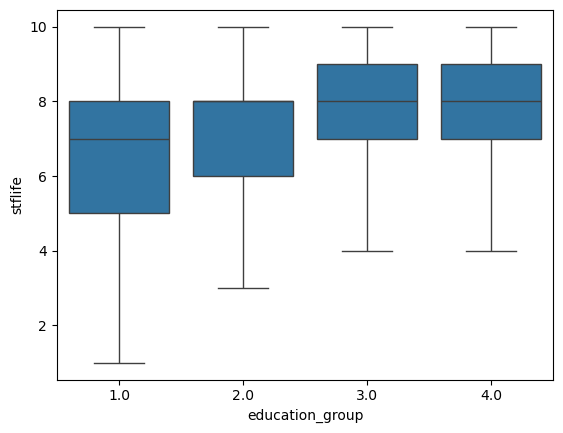

In [75]:
fig, ax = plt.subplots()
sns.boxplot(x=df_clean['education_group'], y=df_clean['stflife'], showfliers=False)
plt.show()

In [ ]:
def categorize_education(years):
    if years <= 10:
        return 1
    elif years <= 13:
        return 2
    elif years <= 16:
        return 3
    elif years >= 17:
        return 4
    else:
        return None  # Handle missing values

df_clean['education_group'] = df_clean['eduyrs'].apply(categorize_education)
df_clean['']

C:\Users\User\AppData\Local\Temp\ipykernel_22628\4267514253.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_clean['education_group'] = df_clean['eduyrs'].apply(categorize_education)
C:\Users\User\AppData\Local\Temp\ipykernel_22628\4267514253.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['education_group'] = df_clean['eduyrs'].apply(categorize_education)


In [71]:
df_clean.to_csv('../data/year_2023_cleaned.csv', index=False)

In [70]:
df_clean

,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,...,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19,education_group
0,8.0,6.0,5.0,4.0,3.0,12.0,0.0,NaN,65.0,10.0,...,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN,2.0
1,9.0,1.0,10.0,7.0,2.0,14.0,0.0,6.0,21.0,4.0,...,2.0,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN,3.0
2,10.0,5.0,6.0,4.0,1.0,16.0,0.0,NaN,53.0,8.0,...,3.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN,3.0
3,7.0,2.0,6.0,6.0,3.0,14.0,0.0,4.0,78.0,9.0,...,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN,3.0
4,9.0,NaN,6.0,5.0,2.0,12.0,0.0,NaN,64.0,8.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,5.0,5.0,5.0,6.0,2.0,NaN,0.0,6.0,18.0,10.0,...,3.0,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN,NaN
40152,10.0,7.0,7.0,4.0,2.0,14.0,0.0,NaN,56.0,10.0,...,2.0,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN,3.0
40153,10.0,10.0,5.0,6.0,2.0,17.0,0.0,NaN,31.0,5.0,...,3.0,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,4.0
40154,8.0,NaN,0.0,7.0,1.0,8.0,0.0,6.0,15.0,2.0,...,3.0,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN,1.0


In [67]:
df_edu = df_clean['eduyrs']
df_edu

0        12.0
1        14.0
2        16.0
3        14.0
4        12.0
         ... 
40151     NaN
40152    14.0
40153    17.0
40154     8.0
40155    13.0
Name: eduyrs, Length: 39863, dtype: float64

In [59]:
df_clean['eduyrs'].sort_values(ascending=False).head(20)



8616     69.0
27151    67.0
16657    50.0
36647    50.0
8991     50.0
1550     47.0
9395     45.0
9991     45.0
24782    45.0
5339     45.0
39980    44.0
39834    44.0
1021     42.0
700      42.0
17714    40.0
20021    40.0
8673     40.0
11062    40.0
9507     40.0
20002    40.0
Name: eduyrs, dtype: float64

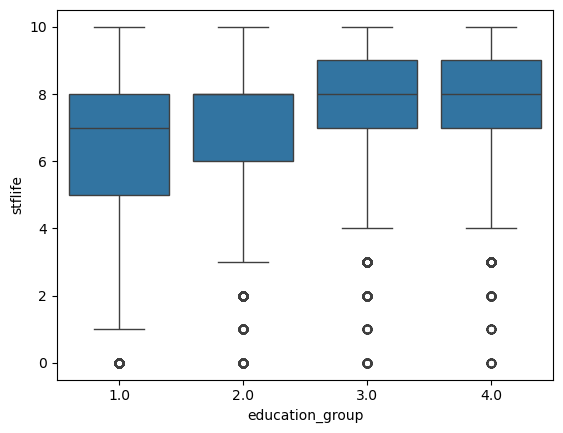

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.boxplot(x=df_clean['education_group'], y=df_clean['stflife'], showfliers=True)  # Changed to True
plt.show()

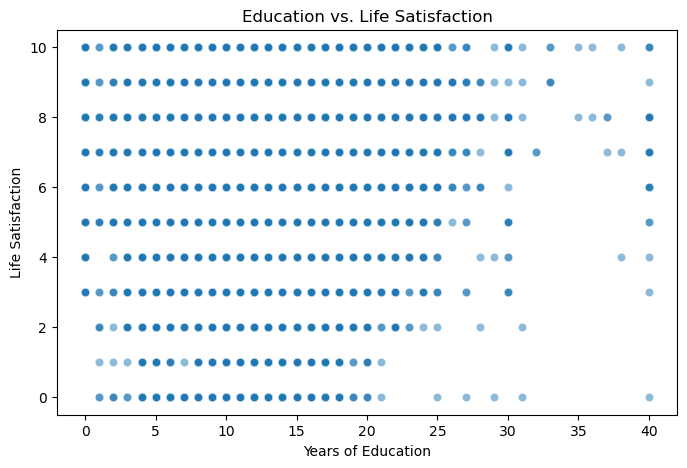

Correlation between Education and Life Satisfaction: 0.128


In [50]:
filtered_df_edu = df[df['eduyrs'].between(0, 40)].copy()
plt.figure(figsize=(8,5))
sns.scatterplot(x=filtered_df_edu['eduyrs'], y=filtered_df_edu['stflife'], alpha=0.5)
plt.xlabel("Years of Education")
plt.ylabel("Life Satisfaction")
plt.title("Education vs. Life Satisfaction")
plt.show()

correlation_edu = filtered_df_edu[['eduyrs', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Education and Life Satisfaction: {correlation_edu:.3f}")


- No strong visible trend—education levels are widely spread across life satisfaction levels.

- Some individuals with low education (0-5 years) report high satisfaction, while some with high education (30+ years) are dissatisfied.

- Overall, education does not appear to be a major determinant of life satisfaction.

- Correlation: 0.128 (Weakest positive correlation so far).

- Conclusion: Education is weakly associated with life satisfaction. Compared to factors like health, social trust, and income, education has a much smaller impact on well-being.

In [77]:
correlation = df_clean['education_group'].corr(df_clean['stflife'])

print(f"Correlation between Education Group and Life Satisfaction: {correlation:.3f}")

Correlation between Education Group and Life Satisfaction: 0.122


In [52]:
df['marsts'].value_counts()


marsts
66    19176
6     11784
4      3747
5      3564
1       906
3       288
77      185
2       152
88       31
99       30
Name: count, dtype: int64

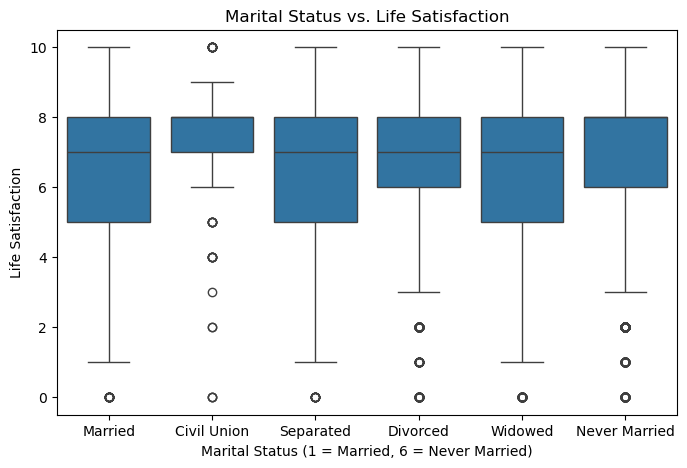

Correlation between Marital Status and Life Satisfaction: 0.064


In [54]:
# Create a temporary filtered dataset (without modifying df)
filtered_df_marital = df[df['marsts'].between(1, 6)].copy()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=filtered_df_marital['marsts'], y=filtered_df_marital['stflife'])
plt.xlabel("Marital Status (1 = Married, 6 = Never Married)")
plt.ylabel("Life Satisfaction")
plt.title("Marital Status vs. Life Satisfaction")
plt.xticks(ticks=[0,1,2,3,4,5], labels=["Married", "Civil Union", "Separated", "Divorced", "Widowed", "Never Married"])
plt.show()

correlation_marital = filtered_df_marital[['marsts', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Marital Status and Life Satisfaction: {correlation_marital:.3f}")


No major differences in median life satisfaction between marital groups.

Married individuals appear slightly higher in median satisfaction, but the effect is small.

All groups show a wide spread of satisfaction, meaning marital status alone doesn't define well-being.

Civil union has a slightly higher median, but this might be due to smaller sample size.

Correlation: 0.064 (Weakest effect so far).

Conclusion: Marital status has almost no impact on life satisfaction. Compared to health, trust, and income, relationship status is not a strong predictor of well-being.

In [79]:
df_clean['agea'].describe()


count    39604.000000
mean        51.703288
std         18.730467
min         15.000000
25%         37.000000
50%         53.000000
75%         67.000000
max         90.000000
Name: agea, dtype: float64

In [82]:
import pandas as pd

def categorize_age_5_groups(age):
    """Categorizes age into 5 groups."""
    if age <= 29:
        return 1
    elif age <= 44:
        return 2
    elif age <= 59:
        return 3
    elif age <= 74:
        return  4
    elif age >= 75 and age <= 100:
        return 5
    else:
        return None  # Handle missing

# Assuming your age data is in a pandas DataFrame called 'df' and the age column is 'agea'
# Create a new column 'age_group_5' with the categorized ages
df_clean['age_group'] = df_clean['agea'].apply(categorize_age_5_groups)

# Now you can use the 'age_group_5' column for your analysis and visualizations

C:\Users\User\AppData\Local\Temp\ipykernel_22628\717046469.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['age_group'] = df_clean['agea'].apply(categorize_age_5_groups)


In [83]:
df_clean

,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,...,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19,education_group,age_group
0,8.0,6.0,5.0,4.0,3.0,12.0,0.0,NaN,65.0,10.0,...,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN,2.0,4.0
1,9.0,1.0,10.0,7.0,2.0,14.0,0.0,6.0,21.0,4.0,...,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN,3.0,1.0
2,10.0,5.0,6.0,4.0,1.0,16.0,0.0,NaN,53.0,8.0,...,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN,3.0,3.0
3,7.0,2.0,6.0,6.0,3.0,14.0,0.0,4.0,78.0,9.0,...,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN,3.0,5.0
4,9.0,NaN,6.0,5.0,2.0,12.0,0.0,NaN,64.0,8.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,5.0,5.0,5.0,6.0,2.0,NaN,0.0,6.0,18.0,10.0,...,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN,NaN,1.0
40152,10.0,7.0,7.0,4.0,2.0,14.0,0.0,NaN,56.0,10.0,...,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN,3.0,3.0
40153,10.0,10.0,5.0,6.0,2.0,17.0,0.0,NaN,31.0,5.0,...,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,4.0,2.0
40154,8.0,NaN,0.0,7.0,1.0,8.0,0.0,6.0,15.0,2.0,...,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN,1.0,1.0


In [85]:
df_clean.to_csv('../data/year_2023_cleaned.csv', index=False)

correlation between age and life satisfaction
Correlation 0.202


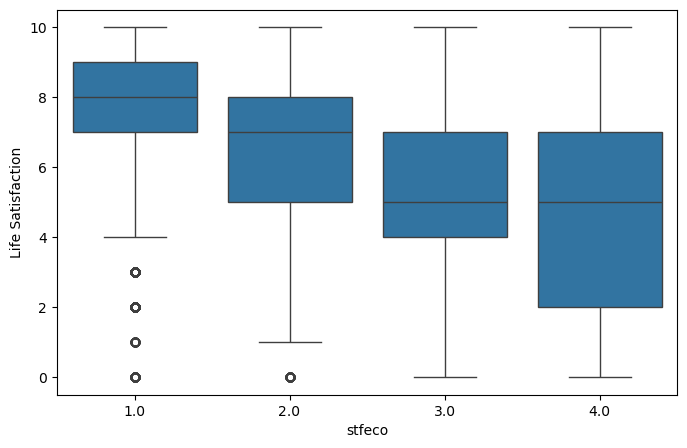

In [100]:
# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df_clean['fltdpr'], y=df_clean['stflife'])
plt.xlabel("stfeco")
plt.ylabel("Life Satisfaction")

print("correlation between age and life satisfaction")
correlation_age = df_clean[['hlthhmp', 'stflife']].corr().iloc[0, 1]
print(f"Correlation {correlation_age:.3f}")


- No strong visible trend → Life satisfaction is spread across all ages.
- Satisfaction levels appear similar at all ages without a clear upward or downward pattern.
- No strong U-shape pattern (young and old being happier with midlife dips).
2. Correlation Analysis (-0.050)
- Weak negative correlation (-0.050) → Slight tendency for life satisfaction to decline very slightly with age, but the effect is negligible.
- Weaker than health (-0.288), social trust (0.248), and income (0.22).
- Very close to 0, meaning age has little to no impact on life satisfaction.

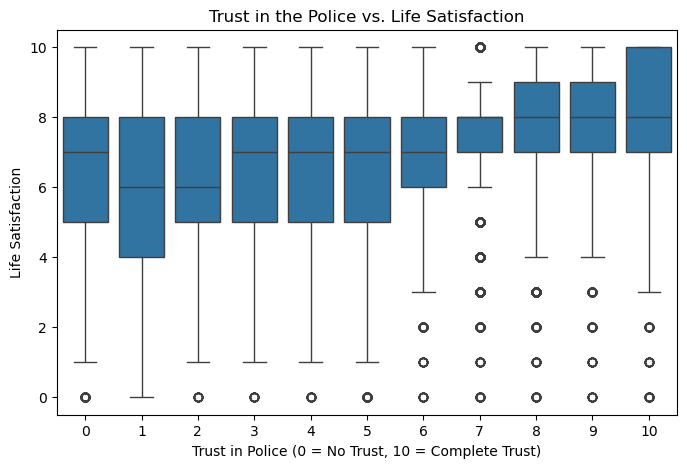

Correlation between Trust in Police and Life Satisfaction: 0.278


In [61]:
df['trstprl'].value_counts()
# Filter valid values (0-10 scale)
filtered_df_police = df[df['trstplc'].between(0, 10)].copy()

# Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=filtered_df_police['trstplc'], y=filtered_df_police['stflife'])
plt.xlabel("Trust in Police (0 = No Trust, 10 = Complete Trust)")
plt.ylabel("Life Satisfaction")
plt.title("Trust in the Police vs. Life Satisfaction")
plt.show()

correlation_police = filtered_df_police[['trstplc', 'stflife']].corr().iloc[0, 1]
print(f"Correlation between Trust in Police and Life Satisfaction: {correlation_police:.3f}")


- Higher trust in the police is linked to higher median life satisfaction.
- People with low trust (0-3) show more variability in satisfaction, with more reporting lower well-being.
- Those with high trust (8-10) tend to have consistently higher life satisfaction.
2. Correlation Analysis (0.278)
- Moderate positive correlation (0.278) → Trusting the police is positively associated with life satisfaction.
- Stronger than income (0.22) and social trust (0.248).
- Weaker than health (-0.288) but still significant.

In [4]:
# Load the JSON file
with open("invalid_responses.json", "r") as file:
    invalid_values = json.load(file)

# Extract only the columns that are in the JSON file + 'stflife' (life satisfaction)
columns_to_keep = list(invalid_values.keys())
# Reduce the dataset to only those columns
df_filtered = df[columns_to_keep].copy()


In [5]:
for col, invalids in invalid_values.items():
    if col in df_filtered.columns:
        df_filtered[col] = df_filtered[col].apply(lambda x: None if x in invalids else x)  # Replace invalid values with NaN


In [135]:
df_filtered

,cntry,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,...,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19,cntry
0,AT,8,6.0,5.0,4.0,3,12.0,0,NaN,65.0,...,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN,AT
1,AT,9,1.0,10.0,7.0,2,14.0,0,6.0,21.0,...,2.0,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN,AT
2,AT,10,5.0,6.0,4.0,1,16.0,0,NaN,53.0,...,3.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN,AT
3,AT,7,2.0,6.0,6.0,3,14.0,0,4.0,78.0,...,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN,AT
4,AT,9,NaN,6.0,5.0,2,12.0,0,NaN,64.0,...,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,AT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,SK,5,5.0,5.0,6.0,2,NaN,0,6.0,18.0,...,3.0,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN,SK
40152,SK,10,7.0,7.0,4.0,2,14.0,0,NaN,56.0,...,2.0,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN,SK
40153,SK,10,10.0,5.0,6.0,2,17.0,0,NaN,31.0,...,3.0,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,SK
40154,SK,8,NaN,0.0,7.0,1,8.0,0,6.0,15.0,...,3.0,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN,SK


In [102]:
# Extract only correlations with 'stflife', drop NaN, and sort
correlation_results = df_clean.corr().loc["stflife"].dropna().sort_values(ascending=False)

# Display the sorted correlation values
print(correlation_results)


stflife    1.000000
happy      0.679963
wrhpp      0.407123
ctrlife    0.401551
enjlf      0.391731
             ...   
cldgng    -0.291576
flteeff   -0.306797
fltlnl    -0.326955
fltsd     -0.346467
fltdpr    -0.354942
Name: stflife, Length: 252, dtype: float64


In [101]:
correlation_results

NameError: name 'correlation_results' is not defined

In [109]:
correlation_results = df_filtered.corr().loc[:, "stflife"].dropna().sort_values(ascending=False)
print(correlation_results)

stflife    1.000000
happy      0.679963
wrhpp      0.407123
ctrlife    0.401551
enjlf      0.391731
             ...   
cldgng    -0.291576
flteeff   -0.306797
fltlnl    -0.326955
fltsd     -0.346467
fltdpr    -0.354942
Name: stflife, Length: 250, dtype: float64


In [103]:
# Assuming correlation_with_stflife is your correlation data (replace with your actual correlation data)
sorted_correlations = correlation_results.abs().sort_values(ascending=False)
sorted_correlations

stflife     1.000000
happy       0.679963
wrhpp       0.407123
ctrlife     0.401551
enjlf       0.391731
              ...   
trhltacp    0.000658
trhlthy     0.000351
pbldmna     0.000131
ctzcntr     0.000131
chldhhe     0.000025
Name: stflife, Length: 252, dtype: float64

In [106]:
correlation_dict = correlation_results.to_dict()

# Save correlation results to a JSON file
with open("correlation_results.json", "w") as file:
    json.dump(correlation_dict, file, indent=4)

print("Correlation results saved successfully.")

Correlation results saved successfully.


In [127]:
import json

# Load the JSON file
with open("cleaning.json", "r") as file:
    data = json.load(file)

# Extract the "variables" section
variables = data.get("variables", {})

# Initialize an empty dictionary for interpretations
interpretations = {}

# Loop through each variable inside "variables"
for var_name, details in variables.items():
    description = details.get("description", "No description available.")

    # Extract valid response options (exclude refusals, don't know, etc.)
    codelist = details.get("codelist", {})
    valid_codes = {k: v for k, v in codelist.items() if "*" not in v}  # Keep only valid responses

    # Format interpretation
    interpretation_text = f"{description} Valid responses: {valid_codes}."
    
    # Store in dictionary
    interpretations[var_name] = interpretation_text

# Save to interpretations.json
with open("interpretations.json", "w") as file:
    json.dump(interpretations, file, indent=4)

print("✅ interpretations.json generated successfully!")


✅ interpretations.json generated successfully!


In [120]:
import json

# Load the JSON file (update filename if needed)
with open("cleaning.json", "r") as file:
    question_metadata = json.load(file)

# Function to get the description from the nested "variables" key
def get_description(factor):
    return question_metadata.get("variables", {}).get(factor, {}).get("description", factor)

# Test it
print(get_description("wrhpp"))  # Should return "Were happy, how often past week"
print(get_description("ctrlife"))  # Should return "How much control over life"
print(get_description("nonexistent_var"))  # Should return "nonexistent_var" (default)


Were happy, how often past week
How much control over life in general nowadays
nonexistent_var


In [118]:
"variables" in question_metadata


True

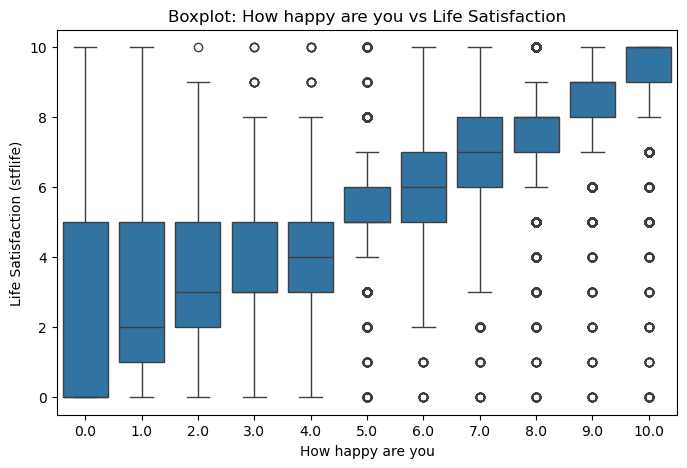

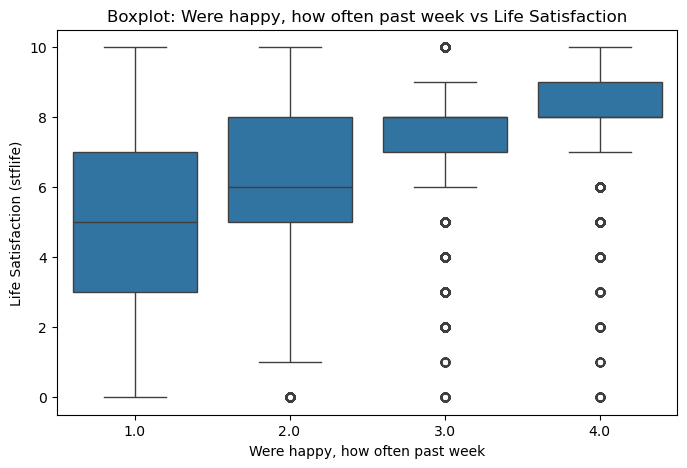

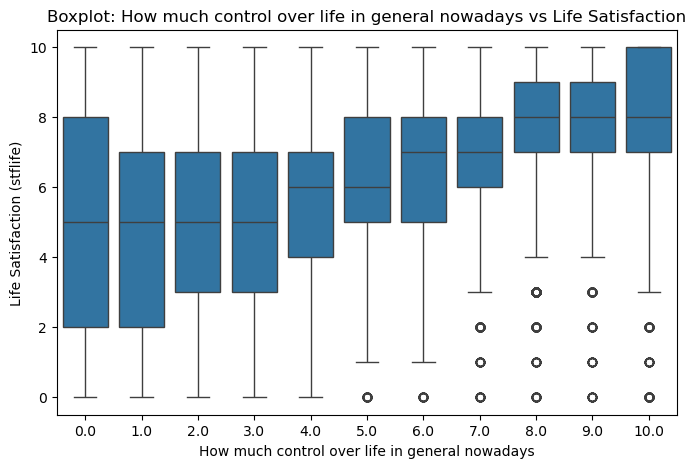

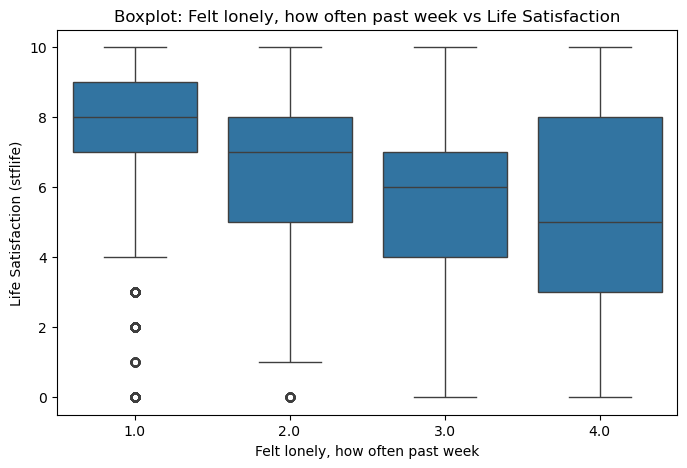

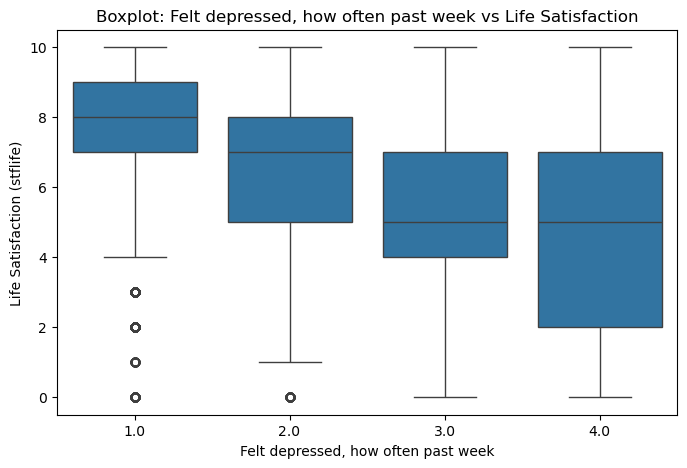

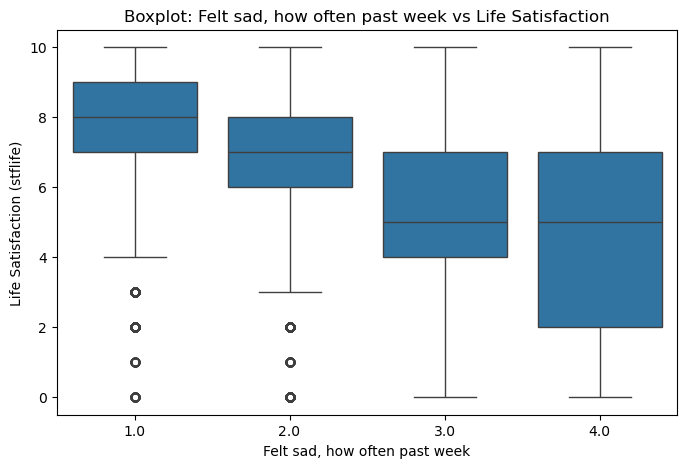

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of initial factors to plot (first batch: 3 positive, 3 negative)
initial_factors = ["happy", "wrhpp", "ctrlife", "fltlnl", "fltdpr", "fltsd"]

# Re-run the first batch of plots with updated descriptions for better interpretation
for factor in initial_factors:
    plt.figure(figsize=(8, 5))
    description = get_description(factor)  # Get readable title
    
    if df_filtered[factor].nunique() < 15:
        sns.boxplot(x=df_filtered[factor], y=df_filtered["stflife"])
        plt.xlabel(description)
        plt.ylabel("Life Satisfaction (stflife)")
        plt.title(f"Boxplot: {description} vs Life Satisfaction")
    else:
        sns.scatterplot(x=df_filtered[factor], y=df_filtered["stflife"], alpha=0.5)
        plt.xlabel(description)
        plt.ylabel("Life Satisfaction (stflife)")
        plt.title(f"Scatterplot: {description} vs Life Satisfaction")
    
    plt.show()



In [124]:
# Split correlation values into three categories:
# 1. Strong correlations (>|0.3|)
# 2. Moderate correlations (0.15 - 0.3 or -0.15 to -0.3)
# 3. Weak correlations (<|0.15|)

# Compute correlation of all factors with life satisfaction
correlations = df_filtered.corr()["stflife"].dropna().sort_values(ascending=False)

# Define thresholds
strong_threshold = 0.3
moderate_threshold = 0.15

# Split correlations into categories
strong_corr = correlations[abs(correlations) >= strong_threshold]
moderate_corr = correlations[(abs(correlations) >= moderate_threshold) & (abs(correlations) < strong_threshold)]
weak_corr = correlations[abs(correlations) < moderate_threshold]

# Display the categories
import pandas as pd

# Create a dataframe to display
correlation_df = pd.DataFrame({
    "Factor": correlations.index,
    "Correlation": correlations.values,
    "Category": ["Strong" if abs(c) >= strong_threshold else "Moderate" if abs(c) >= moderate_threshold else "Weak" for c in correlations.values]
})

# Show results
print(correlation_df)

      Factor  Correlation  Category
0    stflife     1.000000    Strong
1      happy     0.679963    Strong
2      wrhpp     0.407123    Strong
3    ctrlife     0.401551    Strong
4      enjlf     0.391731    Strong
..       ...          ...       ...
245   cldgng    -0.291576  Moderate
246  flteeff    -0.306797    Strong
247   fltlnl    -0.326955    Strong
248    fltsd    -0.346467    Strong
249   fltdpr    -0.354942    Strong

[250 rows x 3 columns]


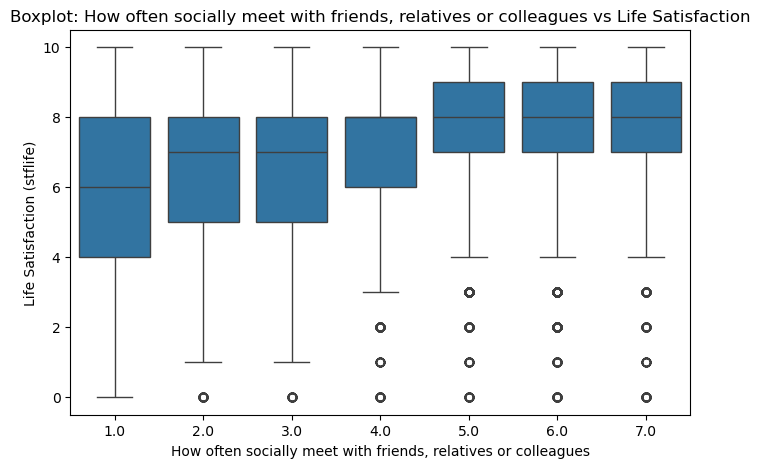

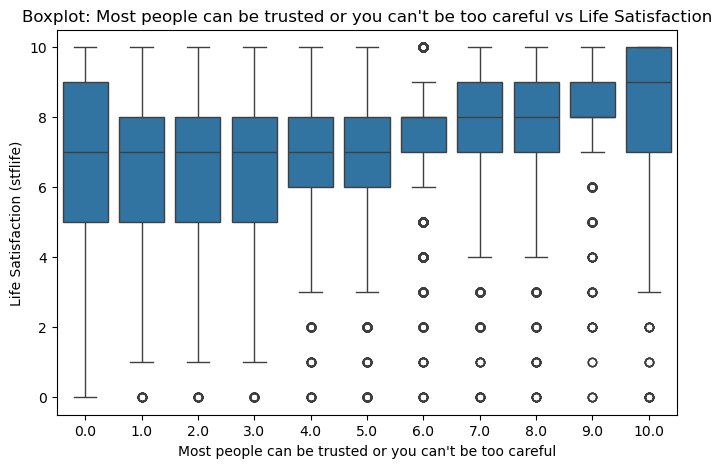

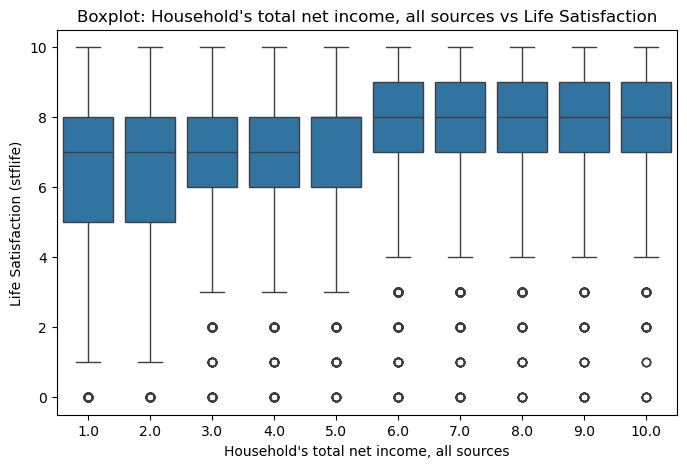

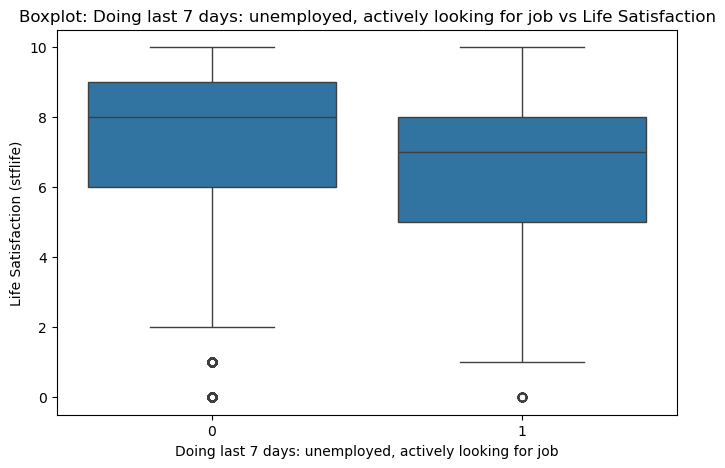

In [125]:
# Define the next batch of factors for plotting
next_factors = ["sclmeet", "ppltrst", "hinctnta", "uempla"]

# Generate plots for each factor
for factor in next_factors:
    plt.figure(figsize=(8, 5))
    description = get_description(factor)  # Get readable title

    # Boxplot for categorical variables, scatterplot for continuous variables
    if df_filtered[factor].nunique() < 15:
        sns.boxplot(x=df_filtered[factor], y=df_filtered["stflife"])
        plt.xlabel(description)
        plt.ylabel("Life Satisfaction (stflife)")
        plt.title(f"Boxplot: {description} vs Life Satisfaction")
    else:
        sns.scatterplot(x=df_filtered[factor], y=df_filtered["stflife"], alpha=0.5)
        plt.xlabel(description)
        plt.ylabel("Life Satisfaction (stflife)")
        plt.title(f"Scatterplot: {description} vs Life Satisfaction")

    plt.show()


In [143]:
import json

# Load the JSON file containing variable descriptions
with open("cleaning.json", "r") as file:
    data = json.load(file)

# Extract the "variables" section
variables = data.get("variables", {})

# Load invalid values JSON to get the list of columns to keep
with open("invalid_responses.json", "r") as file:
    invalid_values = json.load(file)

# Define the columns we want interpretations for
columns_to_keep = list(invalid_values.keys()) + ["stflife"]

# Initialize an empty dictionary for interpretations
interpretations = {}

# Loop through only the columns we are interested in
for var_name in columns_to_keep:
    if var_name in variables:
        details = variables[var_name]
        description = details.get("description", "No description available.")

        # Extract valid response options (exclude refusals, don't know, etc.)
        codelist = details.get("codelist", {})
        valid_codes = {k: v for k, v in codelist.items() if "*" not in v}  # Keep only valid responses

        # Format interpretation
        interpretation_text = f"{description} Valid responses: {valid_codes}."
        
        # Store in dictionary
        interpretations[var_name] = interpretation_text

# Save to interpretations.json
with open("interpretations.json", "w") as file:
    json.dump(interpretations, file, indent=4)

print("✅ interpretations.json generated successfully with only relevant columns!")


✅ interpretations.json generated successfully with only relevant columns!


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json



# Load invalid values JSON to get the list of columns to keep
with open("invalid_responses.json", "r") as file:
    invalid_values = json.load(file)

# Define the columns we want to generate graphs for
columns_to_keep = list(invalid_values.keys())
print(len(columns_to_keep))
columns_to_keep
print(len(columns_to_keep))
columns_to_keep = list(invalid_values.keys()) 
columns_to_keep

invalid_values



250
250


{'stflife': [77, 88, 99],
 'hinctnta': [77, 88, 99],
 'ppltrst': [77, 88, 99],
 'sclmeet': [77, 88, 99],
 'health': [77, 88, 99],
 'eduyrs': [77, 88, 99],
 'uempla': [],
 'marsts': [66, 77, 88, 99],
 'agea': [999],
 'trstplc': [77, 88, 99],
 'trstprl': [77, 88, 99],
 'rlgdgr': [77, 88, 99],
 'wkhtot': [666, 777, 888, 999],
 'nwspol': [7777, 8888, 9999],
 'netusoft': [7, 8, 9],
 'netustm': [6666, 7777, 8888, 9999],
 'pplfair': [77, 88, 99],
 'pplhlp': [77, 88, 99],
 'polintr': [7, 8, 9],
 'psppsgva': [7, 8, 9],
 'actrolga': [7, 8, 9],
 'psppipla': [7, 8, 9],
 'cptppola': [7, 8, 9],
 'trstlgl': [77, 88, 99],
 'trstplt': [77, 88, 99],
 'trstprt': [77, 88, 99],
 'trstep': [77, 88, 99],
 'trstun': [77, 88, 99],
 'vote': [3, 7, 8, 9],
 'contplt': [7, 8, 9],
 'donprty': [7, 8, 9],
 'sgnptit': [7, 8, 9],
 'pbldmna': [7, 8, 9],
 'bctprd': [7, 8, 9],
 'pstplonl': [7, 8, 9],
 'volunfp': [7, 8, 9],
 'lrscale': [77, 88, 99],
 'stfeco': [77, 88, 99],
 'stfgov': [77, 88, 99],
 'stfdem': [77, 88, 99],

In [45]:
df_clean = df[columns_to_keep]
df_clean

invalid_dict = invalid_values.copy()
invalid_dict
for column, invalid_value in invalid_dict.items():
    df_clean.loc[df_clean[column].isin(invalid_value), column] = np.nan


df_clean

,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,...,ipadvnta,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19
0,8.0,6.0,5.0,4.0,3.0,12.0,0.0,NaN,65.0,10.0,...,5.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN
1,9.0,1.0,10.0,7.0,2.0,14.0,0.0,6.0,21.0,4.0,...,4.0,2.0,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN
2,10.0,5.0,6.0,4.0,1.0,16.0,0.0,NaN,53.0,8.0,...,4.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN
3,7.0,2.0,6.0,6.0,3.0,14.0,0.0,4.0,78.0,9.0,...,4.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN
4,9.0,NaN,6.0,5.0,2.0,12.0,0.0,NaN,64.0,8.0,...,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,5.0,5.0,5.0,6.0,2.0,NaN,0.0,6.0,18.0,10.0,...,3.0,3.0,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN
40152,10.0,7.0,7.0,4.0,2.0,14.0,0.0,NaN,56.0,10.0,...,3.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN
40153,10.0,10.0,5.0,6.0,2.0,17.0,0.0,NaN,31.0,5.0,...,5.0,3.0,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN
40154,8.0,NaN,0.0,7.0,1.0,8.0,0.0,6.0,15.0,2.0,...,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN


In [47]:

correlation_with_stflife = df_clean.corrwith(df_clean["stflife"])



sorted_correlations = correlation_with_stflife.sort_values(ascending=False)

# Print the sorted correlations
print(sorted_correlations)

stflife    1.000000
happy      0.679963
wrhpp      0.407123
ctrlife    0.401551
enjlf      0.391731
             ...   
cldgng    -0.291576
flteeff   -0.306797
fltlnl    -0.326955
fltsd     -0.346467
fltdpr    -0.354942
Length: 250, dtype: float64


In [48]:
df_clean.to_csv('../data/cleaned_year_2023.csv', index=False)

In [35]:
print(df['stflife'].value_counts())

stflife
8     11040
7      7386
9      6240
10     4048
5      3704
6      3656
4      1431
3      1157
2       630
0       347
1       224
Name: count, dtype: int64


In [49]:
import json

# Load the cleaning JSON file (replace with your file path)
with open('cleaning.json', 'r') as f:
    cleaning_data = json.load(f)


In [53]:
# Example of column names from your data
columns = columns_to_keep.copy()

# Create a mapping from column names to descriptions
column_to_description = {}

for col in columns:
    if col in cleaning_data['variables']:
        column_to_description[col] = cleaning_data['variables'][col]['description']
    else:
        column_to_description[col] = "Description not available"

# Show the mapping for verification
print(column_to_description)

with open('column_descriptions.json', 'w') as json_file:
    json.dump(column_to_description, json_file, indent=4)


{'stflife': 'How satisfied with life as a whole', 'hinctnta': "Household's total net income, all sources", 'ppltrst': "Most people can be trusted or you can't be too careful", 'sclmeet': 'How often socially meet with friends, relatives or colleagues', 'health': 'Subjective general health', 'eduyrs': 'Years of full-time education completed', 'uempla': 'Doing last 7 days: unemployed, actively looking for job', 'marsts': 'Legal marital status', 'agea': 'Age of respondent, calculated', 'trstplc': 'Trust in the police', 'trstprl': "Trust in country's parliament", 'rlgdgr': 'How religious are you', 'wkhtot': 'Total hours normally worked per week in main job overtime included', 'nwspol': 'News about politics and current affairs, watching, reading or listening, in minutes', 'netusoft': 'Internet use, how often', 'netustm': 'Internet use, how much time on typical day, in minutes', 'pplfair': 'Most people try to take advantage of you, or try to be fair', 'pplhlp': 'Most of the time people helpfu

In [57]:
import json

# Assuming correlation_with_stflife is your correlation data (replace with your actual correlation data)
sorted_correlations = correlation_with_stflife.sort_values(ascending=False)
abs_sorted_correlations = correlation_with_stflife.abs().sort_values(ascending=False)

# Example of column names from your data
columns = columns_to_keep.copy()

# Create a mapping from column names to descriptions, ordered by correlation value
column_to_description = {}

for col in abs_sorted_correlations.index:  # Iterate over sorted column names based on correlation
    if col in cleaning_data['variables']:
        column_to_description[col] = cleaning_data['variables'][col]['description']
    else:
        column_to_description[col] = "Description not available"

# Show the sorted mapping for verification
print(column_to_description)

# Write the sorted descriptions to a JSON file
with open('column_descriptions.json', 'w') as json_file:
    json.dump(column_to_description, json_file, indent=4)

{'stflife': 'How satisfied with life as a whole', 'happy': 'How happy are you', 'wrhpp': 'Were happy, how often past week', 'ctrlife': 'How much control over life in general nowadays', 'enjlf': 'Enjoyed life, how often past week', 'stfeco': 'How satisfied with present state of economy in country', 'fltdpr': 'Felt depressed, how often past week', 'fltsd': 'Felt sad, how often past week', 'fltlnl': 'Felt lonely, how often past week', 'flteeff': 'Felt everything did as effort, how often past week', 'stfdem': 'How satisfied with the way democracy works in country', 'cldgng': 'Could not get going, how often past week', 'health': 'Subjective general health', 'trstplc': 'Trust in the police', 'pplfair': 'Most people try to take advantage of you, or try to be fair', 'trstlgl': 'Trust in the legal system', 'stfhlth': 'State of health services in country nowadays', 'ppltrst': "Most people can be trusted or you can't be too careful", 'pplhlp': 'Most of the time people helpful or mostly looking ou

In [108]:
df

,name,essround,edition,proddate,idno,cntry,dweight,pspwght,pweight,anweight,...,rinwe,inwde,jinws,jinwe,inwtm,mode,domain,prob,stratum,psu
0,ESS11e02,11,2.0,20.11.2024,50014,AT,1.185115,0.392891,0.330915,0.130013,...,NaN,2023-11-12 15:26:55,2023-11-12 15:21:28,2023-11-12 15:26:55,30.0,1,2.0,0.000579,107,317
1,ESS11e02,11,2.0,20.11.2024,50030,AT,0.609898,0.325153,0.330915,0.107598,...,NaN,2023-10-18 10:44:18,2023-10-18 10:42:22,2023-10-18 10:44:18,40.0,1,1.0,0.001124,69,128
2,ESS11e02,11,2.0,20.11.2024,50057,AT,1.392330,4.000023,0.330915,1.323666,...,NaN,2023-09-30 14:13:33,2023-09-30 14:08:31,2023-09-30 14:13:33,42.0,1,2.0,0.000493,18,418
3,ESS11e02,11,2.0,20.11.2024,50106,AT,0.556061,0.176228,0.330915,0.058316,...,NaN,2023-06-30 15:11:21,2023-06-30 15:08:05,2023-06-30 15:11:21,34.0,1,1.0,0.001233,101,295
4,ESS11e02,11,2.0,20.11.2024,50145,AT,0.722795,1.060940,0.330915,0.351080,...,NaN,2023-07-11 11:14:03,2023-07-11 11:10:02,2023-07-11 11:14:03,57.0,1,2.0,0.000949,115,344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,ESS11e02,11,2.0,20.11.2024,86379,SK,1.758655,3.777879,0.315904,1.193448,...,NaN,2023-10-12 17:47:07,2023-10-12 17:44:54,2023-10-12 17:46:41,42.0,1,1.0,0.000432,1394,20053
40152,ESS11e02,11,2.0,20.11.2024,86407,SK,1.302318,0.698084,0.315904,0.220528,...,NaN,2023-11-20 15:30:25,2023-11-20 15:30:03,2023-11-20 15:30:23,46.0,1,1.0,0.000583,1411,20267
40153,ESS11e02,11,2.0,20.11.2024,86408,SK,1.262293,3.717124,0.315904,1.174255,...,NaN,2023-10-23 14:35:45,2023-10-23 14:34:38,2023-10-23 14:35:36,NaN,2,1.0,0.000602,1415,20299
40154,ESS11e02,11,2.0,20.11.2024,86426,SK,4.000705,4.000297,0.315904,1.263711,...,NaN,2023-11-12 12:51:57,2023-11-12 12:50:58,2023-11-12 12:52:38,40.0,1,1.0,0.000184,1415,20302


In [8]:
df_filtered

,cntry,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,...,ipadvnta,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19
0,AT,8.0,6.0,5.0,4.0,3,12.0,0,NaN,65.0,...,5.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN
1,AT,9.0,1.0,10.0,7.0,2,14.0,0,6.0,21.0,...,4.0,2.0,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN
2,AT,10.0,5.0,6.0,4.0,1,16.0,0,NaN,53.0,...,4.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN
3,AT,7.0,2.0,6.0,6.0,3,14.0,0,4.0,78.0,...,4.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN
4,AT,9.0,NaN,6.0,5.0,2,12.0,0,NaN,64.0,...,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,SK,5.0,5.0,5.0,6.0,2,NaN,0,6.0,18.0,...,3.0,3.0,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN
40152,SK,10.0,7.0,7.0,4.0,2,14.0,0,NaN,56.0,...,3.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN
40153,SK,10.0,10.0,5.0,6.0,2,17.0,0,NaN,31.0,...,5.0,3.0,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN
40154,SK,8.0,NaN,0.0,7.0,1,8.0,0,6.0,15.0,...,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN


In [ ]:
data = df_filtered.copy()
data
countries = data['cntry'].unique()  # This gets all unique country names
country_data = {country: data[data['cntry'] == country] for country in countries}
country_data

country_data
dd

{'AT':      cntry  stflife  hinctnta  ppltrst  sclmeet  health  eduyrs  uempla  \
 0       AT      8.0       6.0      5.0      4.0       3    12.0       0   
 1       AT      9.0       1.0     10.0      7.0       2    14.0       0   
 2       AT     10.0       5.0      6.0      4.0       1    16.0       0   
 3       AT      7.0       2.0      6.0      6.0       3    14.0       0   
 4       AT      9.0       NaN      6.0      5.0       2    12.0       0   
 ...    ...      ...       ...      ...      ...     ...     ...     ...   
 2349    AT      8.0       6.0      5.0      4.0       3    12.0       0   
 2350    AT     10.0       6.0      8.0      4.0       2    12.0       0   
 2351    AT      7.0       NaN      3.0      5.0       1     9.0       0   
 2352    AT      9.0       NaN      7.0      4.0       2    12.0       0   
 2353    AT      9.0       3.0      7.0      4.0       3    12.0       1   
 
       marsts  agea  ...  ipadvnta  ipbhprpa  iprspota  iplylfra  impenva  \
 0 

In [9]:
import json

with open('country_data.json', 'w') as f:
    json.dump(country_data, f)

TypeError: Object of type DataFrame is not JSON serializable

In [13]:
data
data.to_csv('country_data.csv', index=False)

In [159]:
country_data_serializable = {}
for country, country_df in country_data.items():
    country_data_serializable[country] = country_df.to_dict(orient='records')

# Save to JSON file
with open('country_data.json', 'w') as f:
    json.dump(country_data_serializable, f)

In [16]:
correlation_results = {}  # A place to store the results

for country, country_df in country_data.items():  # Go through each country
    numerical_cols = country_df.select_dtypes(include=['number']).columns.tolist() #selects numerical columns
    numerical_cols.remove('stflife') #removes strlife from the list of numerical columns
    country_correlations = {}  # A place to store correlations for this country

    for col in numerical_cols:
        correlation = country_df['stflife'].corr(country_df[col])  # Calculate correlation
        country_correlations[col] = correlation  # Store the correlation

    correlation_results[country] = country_correlations  # Store all correlations for this country

# Now you can see the results:
print(correlation_results)

c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :

{'AT': {'hinctnta': 0.224466857404751, 'ppltrst': 0.2643408239848503, 'sclmeet': 0.07838978633277369, 'health': -0.36215205216617, 'eduyrs': 0.058171070016499724, 'uempla': -0.09416928763430256, 'marsts': -0.0019966838115676416, 'agea': -0.0013685648783290979, 'trstplc': 0.21841962984036717, 'trstprl': 0.1753591449292576, 'rlgdgr': 0.03102800475875374, 'wkhtot': -0.023955805155197636, 'nwspol': 0.0008553323578157032, 'netusoft': 0.11351214884500328, 'netustm': -0.05221937737535132, 'pplfair': 0.24705852780431375, 'pplhlp': 0.2543881468374597, 'polintr': -0.03824417038594292, 'psppsgva': 0.14741642030325972, 'actrolga': 0.06402885518360915, 'psppipla': 0.14398623937477248, 'cptppola': 0.04892559878550184, 'trstlgl': 0.18068115176090166, 'trstplt': 0.1749810471514261, 'trstprt': 0.16551557745447068, 'trstep': 0.1723438886266485, 'trstun': 0.12200310420967826, 'vote': -0.08301831236793072, 'contplt': -0.04173331372585123, 'donprty': -0.025645725817202054, 'sgnptit': -0.05108944806025195, 

c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\anaconda3\envs\pytorch-env\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [17]:
correlation_results

{'AT': {'hinctnta': 0.224466857404751,
  'ppltrst': 0.2643408239848503,
  'sclmeet': 0.07838978633277369,
  'health': -0.36215205216617,
  'eduyrs': 0.058171070016499724,
  'uempla': -0.09416928763430256,
  'marsts': -0.0019966838115676416,
  'agea': -0.0013685648783290979,
  'trstplc': 0.21841962984036717,
  'trstprl': 0.1753591449292576,
  'rlgdgr': 0.03102800475875374,
  'wkhtot': -0.023955805155197636,
  'nwspol': 0.0008553323578157032,
  'netusoft': 0.11351214884500328,
  'netustm': -0.05221937737535132,
  'pplfair': 0.24705852780431375,
  'pplhlp': 0.2543881468374597,
  'polintr': -0.03824417038594292,
  'psppsgva': 0.14741642030325972,
  'actrolga': 0.06402885518360915,
  'psppipla': 0.14398623937477248,
  'cptppola': 0.04892559878550184,
  'trstlgl': 0.18068115176090166,
  'trstplt': 0.1749810471514261,
  'trstprt': 0.16551557745447068,
  'trstep': 0.1723438886266485,
  'trstun': 0.12200310420967826,
  'vote': -0.08301831236793072,
  'contplt': -0.04173331372585123,
  'donprty'

In [153]:
correlation_df = correlation_results.copy()
correlation_df

{'AT': {'hinctnta': 0.224466857404751,
  'ppltrst': 0.2643408239848503,
  'sclmeet': 0.07838978633277369,
  'health': -0.36215205216617,
  'eduyrs': 0.058171070016499724,
  'uempla': -0.09416928763430256,
  'marsts': -0.0019966838115676416,
  'agea': -0.0013685648783290979,
  'trstplc': 0.21841962984036717,
  'trstprl': 0.1753591449292576,
  'rlgdgr': 0.03102800475875374,
  'wkhtot': -0.023955805155197636,
  'nwspol': 0.0008553323578157032,
  'netusoft': 0.11351214884500328,
  'netustm': -0.05221937737535132,
  'pplfair': 0.24705852780431375,
  'pplhlp': 0.2543881468374597,
  'polintr': -0.03824417038594292,
  'psppsgva': 0.14741642030325972,
  'actrolga': 0.06402885518360915,
  'psppipla': 0.14398623937477248,
  'cptppola': 0.04892559878550184,
  'trstlgl': 0.18068115176090166,
  'trstplt': 0.1749810471514261,
  'trstprt': 0.16551557745447068,
  'trstep': 0.1723438886266485,
  'trstun': 0.12200310420967826,
  'vote': -0.08301831236793072,
  'contplt': -0.04173331372585123,
  'donprty'

In [22]:
cor_df


,Variable,Country,Correlation
0,hinctnta,AT,0.224467
1,ppltrst,AT,0.264341
2,sclmeet,AT,0.078390
3,health,AT,-0.362152
4,eduyrs,AT,0.058171
...,...,...,...
5971,imptrada,SK,-0.078388
5972,impfuna,SK,-0.094006
5973,respc19a,SK,-0.063186
5974,symtc19,SK,0.047478


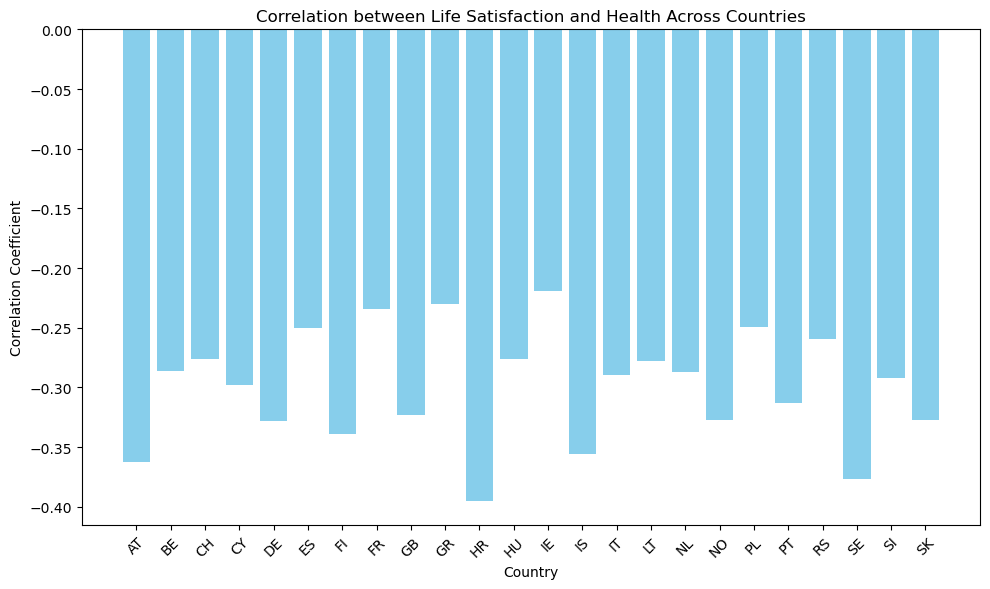

In [24]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the 'health' variable
health_data = cor_df[cor_df['Variable'] == 'health']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(health_data['Country'], health_data['Correlation'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Correlation Coefficient')
plt.title('Correlation between Life Satisfaction and Health Across Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
trans_df

,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,trstprl,...,ipadvnta,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19
AT,0.224467,0.264341,0.078390,-0.362152,0.058171,-0.094169,-0.001997,-0.001369,0.218420,0.175359,...,-0.039200,-0.053599,-0.040907,-0.088757,-0.098757,-0.049493,-0.091408,-0.057772,0.105834,0.171939
BE,0.227648,0.216644,0.107499,-0.286493,0.099673,-0.124195,0.059570,0.001671,0.244578,0.160562,...,0.035998,-0.038635,0.046356,-0.047583,-0.064453,0.013006,-0.082840,-0.027227,0.013826,0.017635
CH,0.140079,0.230472,0.116323,-0.276498,-0.027447,-0.153553,0.021424,0.117049,0.283694,0.213152,...,0.010292,0.002277,-0.045045,-0.078018,-0.020843,-0.087964,-0.045588,0.021081,0.100335,0.039933
CY,0.225637,0.120984,0.176749,-0.298221,0.106816,-0.065870,0.133651,-0.005232,0.116558,0.195693,...,-0.072077,-0.127761,-0.094025,-0.220976,-0.105549,-0.028072,-0.082612,-0.110140,0.104353,0.159104
DE,0.254877,0.177088,0.171351,-0.328131,0.077104,-0.117649,0.019118,0.053349,0.289266,0.247785,...,-0.006924,0.005920,-0.010206,-0.064367,-0.052655,0.011598,-0.023855,-0.055249,0.162073,0.159200
ES,0.157928,0.168331,0.147310,-0.250260,0.004045,-0.082412,-0.004815,-0.011700,0.183533,0.088746,...,-0.051127,-0.022661,-0.014212,-0.047767,-0.050393,-0.081974,-0.106847,0.012695,0.010159,0.076316
FI,0.243642,0.257186,0.132556,-0.339359,0.046738,-0.128290,-0.022351,0.083611,0.250473,0.211863,...,0.013520,-0.048244,0.026228,-0.008909,-0.064871,-0.062743,-0.087396,-0.026355,0.021495,0.119748
FR,0.339391,0.215755,0.123188,-0.234624,0.165808,-0.077375,0.147022,-0.089439,0.222935,0.222565,...,-0.061028,-0.000293,0.012213,-0.010220,-0.024294,0.066203,-0.074375,-0.096704,0.076515,0.119611
GB,0.170583,0.201618,0.176296,-0.322907,0.073941,-0.040712,-0.010042,0.069207,0.264580,0.239821,...,-0.080228,-0.020433,-0.033754,-0.035429,-0.020873,-0.048829,-0.123768,-0.069808,0.059248,0.142270
GR,0.125538,0.175222,0.259251,-0.229760,0.107235,-0.024286,0.113487,-0.138738,0.312442,0.182742,...,-0.021797,-0.097503,-0.048534,-0.108209,-0.050579,-0.064235,-0.152307,-0.072083,0.013969,0.177184


In [49]:
trans_df.to_csv('trans_correlation_results.csv', index=True, index_label='Country')

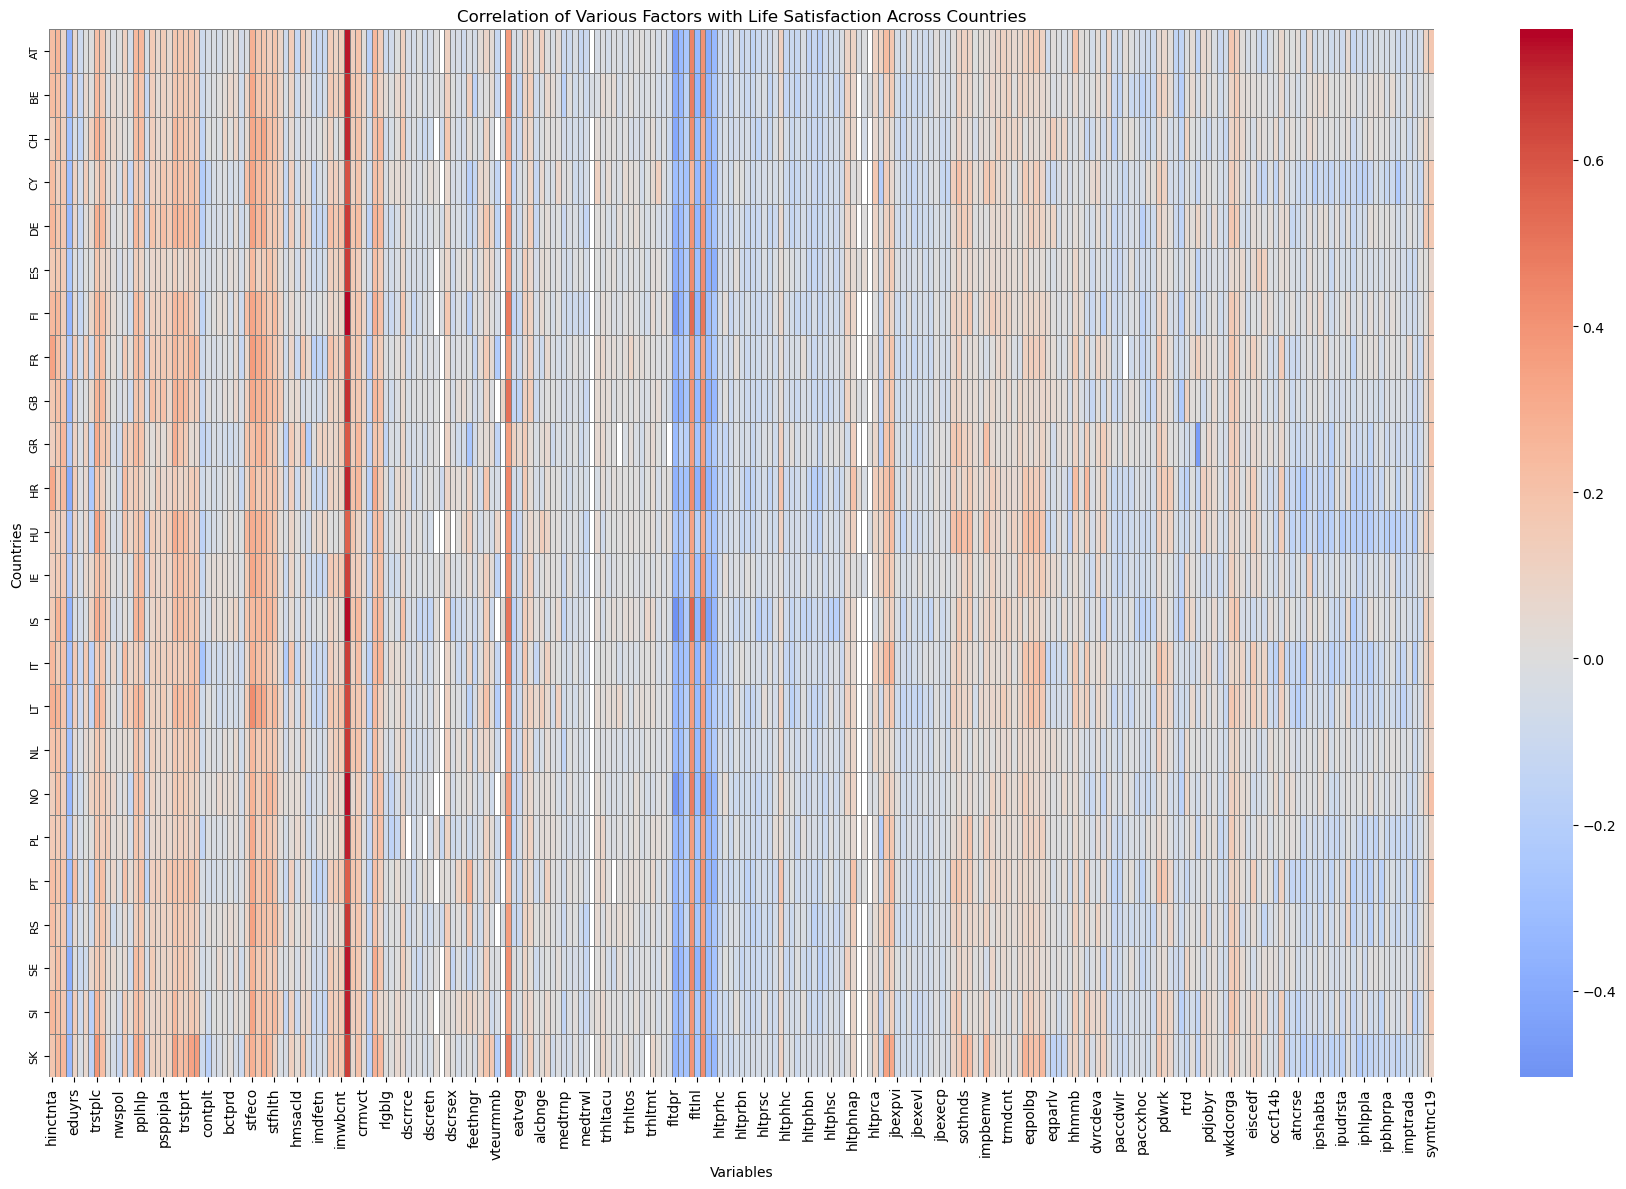

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))  # Adjusted larger size
sns.heatmap(trans_df, annot=False, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5, linecolor='grey')
plt.title('Correlation of Various Factors with Life Satisfaction Across Countries')
plt.xlabel('Variables')
plt.ylabel('Countries')
plt.xticks(rotation=90)  # Adjust rotation and fontsize if needed
plt.yticks(fontsize=8)  # Smaller font size for country names
plt.tight_layout()  # Adjust layout
plt.show()



In [50]:
trans_df

,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,trstprl,...,ipadvnta,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19
AT,0.224467,0.264341,0.078390,-0.362152,0.058171,-0.094169,-0.001997,-0.001369,0.218420,0.175359,...,-0.039200,-0.053599,-0.040907,-0.088757,-0.098757,-0.049493,-0.091408,-0.057772,0.105834,0.171939
BE,0.227648,0.216644,0.107499,-0.286493,0.099673,-0.124195,0.059570,0.001671,0.244578,0.160562,...,0.035998,-0.038635,0.046356,-0.047583,-0.064453,0.013006,-0.082840,-0.027227,0.013826,0.017635
CH,0.140079,0.230472,0.116323,-0.276498,-0.027447,-0.153553,0.021424,0.117049,0.283694,0.213152,...,0.010292,0.002277,-0.045045,-0.078018,-0.020843,-0.087964,-0.045588,0.021081,0.100335,0.039933
CY,0.225637,0.120984,0.176749,-0.298221,0.106816,-0.065870,0.133651,-0.005232,0.116558,0.195693,...,-0.072077,-0.127761,-0.094025,-0.220976,-0.105549,-0.028072,-0.082612,-0.110140,0.104353,0.159104
DE,0.254877,0.177088,0.171351,-0.328131,0.077104,-0.117649,0.019118,0.053349,0.289266,0.247785,...,-0.006924,0.005920,-0.010206,-0.064367,-0.052655,0.011598,-0.023855,-0.055249,0.162073,0.159200
ES,0.157928,0.168331,0.147310,-0.250260,0.004045,-0.082412,-0.004815,-0.011700,0.183533,0.088746,...,-0.051127,-0.022661,-0.014212,-0.047767,-0.050393,-0.081974,-0.106847,0.012695,0.010159,0.076316
FI,0.243642,0.257186,0.132556,-0.339359,0.046738,-0.128290,-0.022351,0.083611,0.250473,0.211863,...,0.013520,-0.048244,0.026228,-0.008909,-0.064871,-0.062743,-0.087396,-0.026355,0.021495,0.119748
FR,0.339391,0.215755,0.123188,-0.234624,0.165808,-0.077375,0.147022,-0.089439,0.222935,0.222565,...,-0.061028,-0.000293,0.012213,-0.010220,-0.024294,0.066203,-0.074375,-0.096704,0.076515,0.119611
GB,0.170583,0.201618,0.176296,-0.322907,0.073941,-0.040712,-0.010042,0.069207,0.264580,0.239821,...,-0.080228,-0.020433,-0.033754,-0.035429,-0.020873,-0.048829,-0.123768,-0.069808,0.059248,0.142270
GR,0.125538,0.175222,0.259251,-0.229760,0.107235,-0.024286,0.113487,-0.138738,0.312442,0.182742,...,-0.021797,-0.097503,-0.048534,-0.108209,-0.050579,-0.064235,-0.152307,-0.072083,0.013969,0.177184


In [54]:
import pandas as pd

# Define the threshold for strong correlation
threshold = 0.2

# Keep only values that meet the threshold, set others to NaN
strong_corrs = trans_df.where(trans_df.abs() > threshold)

# Display the filtered correlations per country
print(strong_corrs)


    hinctnta   ppltrst   sclmeet    health   eduyrs  uempla  marsts      agea  \
AT  0.224467  0.264341       NaN -0.362152      NaN     NaN     NaN       NaN   
BE  0.227648  0.216644       NaN -0.286493      NaN     NaN     NaN       NaN   
CH       NaN  0.230472       NaN -0.276498      NaN     NaN     NaN       NaN   
CY  0.225637       NaN       NaN -0.298221      NaN     NaN     NaN       NaN   
DE  0.254877       NaN       NaN -0.328131      NaN     NaN     NaN       NaN   
ES       NaN       NaN       NaN -0.250260      NaN     NaN     NaN       NaN   
FI  0.243642  0.257186       NaN -0.339359      NaN     NaN     NaN       NaN   
FR  0.339391  0.215755       NaN -0.234624      NaN     NaN     NaN       NaN   
GB       NaN  0.201618       NaN -0.322907      NaN     NaN     NaN       NaN   
GR       NaN       NaN  0.259251 -0.229760      NaN     NaN     NaN       NaN   
HR  0.316038       NaN  0.244545 -0.395403      NaN     NaN     NaN -0.241897   
HU       NaN       NaN      

In [52]:
# Select the top 3 strongest correlations per country (sorted by absolute value)
top_3_vars = trans_df.apply(lambda row: row.abs().nlargest(10).index.tolist(), axis=1)

# Display the top 3 variables per country
print(top_3_vars)


AT    [happy, wrhpp, fltdpr, enjlf, fltsd, health, c...
BE    [happy, wrhpp, enjlf, ctrlife, fltdpr, fltlnl,...
CH    [happy, wrhpp, fltdpr, fltsd, stfdem, stfeco, ...
CY    [happy, stfeco, fltsd, fltlnl, enjlf, cldgng, ...
DE    [happy, wrhpp, enjlf, fltdpr, ctrlife, stfeco,...
ES    [happy, enjlf, wrhpp, fltdpr, fltsd, cldgng, c...
FI    [happy, wrhpp, enjlf, ctrlife, fltdpr, flteeff...
FR    [happy, wrhpp, ctrlife, stfeco, enjlf, fltdpr,...
GB    [happy, ctrlife, enjlf, wrhpp, fltsd, fltdpr, ...
GR    [happy, mainact, wrhpp, enjlf, ctrlife, fltdpr...
HR    [happy, enjlf, ctrlife, wrhpp, health, fltlnl,...
HU    [happy, ctrlife, trstplc, wrhpp, enjlf, trstlg...
IE    [happy, ctrlife, enjlf, wrhpp, stfeco, fltdpr,...
IS    [happy, wrhpp, enjlf, ctrlife, fltdpr, fltsd, ...
IT    [happy, ctrlife, wrhpp, fltlnl, fltsd, fltdpr,...
LT    [happy, stfeco, enjlf, wrhpp, ctrlife, stfgov,...
NL    [happy, wrhpp, enjlf, fltdpr, fltlnl, ctrlife,...
NO    [happy, fltdpr, wrhpp, enjlf, flteeff, ctr

In [58]:
import pandas as pd

# Select the top 10 highest absolute correlations per country
top_10_vars = trans_df.apply(lambda row: row.abs().nlargest(20).index.tolist(), axis=1)

# Convert to a DataFrame for easier analysis
top_10_vars_df = top_10_vars.apply(pd.Series)
top_10_vars_df.columns = [f'Top_Var_{i+1}' for i in range(20)]  # Rename columns

# Save for later use
top_10_vars_df.to_csv('top_10_variables_per_country.csv', index=True)

# Show preview
print(top_10_vars_df.head())


   Top_Var_1 Top_Var_2 Top_Var_3 Top_Var_4 Top_Var_5 Top_Var_6 Top_Var_7  \
AT     happy     wrhpp    fltdpr     enjlf     fltsd    health   ctrlife   
BE     happy     wrhpp     enjlf   ctrlife    fltdpr    fltlnl     fltsd   
CH     happy     wrhpp    fltdpr     fltsd    stfdem    stfeco    fltlnl   
CY     happy    stfeco     fltsd    fltlnl     enjlf    cldgng    fltdpr   
DE     happy     wrhpp     enjlf    fltdpr   ctrlife    stfeco    fltlnl   

   Top_Var_8 Top_Var_9 Top_Var_10 Top_Var_11 Top_Var_12 Top_Var_13 Top_Var_14  \
AT    cldgng    fltlnl    flteeff     stfeco    ppltrst    hlthhmp     pplhlp   
BE   flteeff    stfeco     health    hlthhmp     cldgng    trstplc    pplfair   
CH     enjlf   flteeff    ctrlife     cldgng    trstplc     health     stfgov   
CY    health    stfdem      slprl      wrhpp    ctrlife    flteeff    trstlgl   
DE    health     fltsd    flteeff     stfdem    trstplc    hlthhmp    trstlgl   

   Top_Var_15 Top_Var_16 Top_Var_17 Top_Var_18 Top_Var_1

In [59]:
# Flatten the DataFrame into a single list of variables
all_top_vars = top_10_vars_df.values.flatten()

# Count occurrences of each variable
var_counts = pd.Series(all_top_vars).value_counts()

# Show the most frequently appearing variables
print(var_counts.head(20))  # Show top 20 most common variables


happy       24
stfeco      24
fltdpr      24
enjlf       24
fltsd       24
health      24
ctrlife     24
wrhpp       24
cldgng      23
flteeff     22
fltlnl      22
stfdem      19
hlthhmp     19
trstplc     16
pplfair     16
hinctnta    14
trstlgl     13
slprl       13
stfgov      12
ppltrst     11
Name: count, dtype: int64


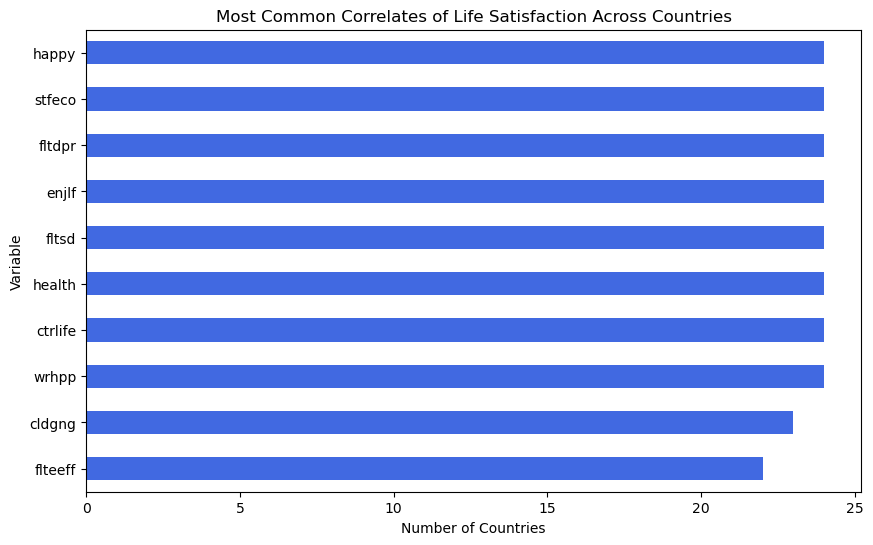

In [61]:
import matplotlib.pyplot as plt

# Plot the top 10 most frequent variables
var_counts.head(10).plot(kind='barh', figsize=(10, 6), color='royalblue')

plt.xlabel('Number of Countries')
plt.ylabel('Variable')
plt.title('Most Common Correlates of Life Satisfaction Across Countries')
plt.gca().invert_yaxis()  # Invert to show highest at the top
plt.show()


In [62]:
data

,cntry,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,...,ipadvnta,ipbhprpa,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19
0,AT,8.0,6.0,5.0,4.0,3,12.0,0,NaN,65.0,...,5.0,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN
1,AT,9.0,1.0,10.0,7.0,2,14.0,0,6.0,21.0,...,4.0,2.0,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN
2,AT,10.0,5.0,6.0,4.0,1,16.0,0,NaN,53.0,...,4.0,3.0,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN
3,AT,7.0,2.0,6.0,6.0,3,14.0,0,4.0,78.0,...,4.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN
4,AT,9.0,NaN,6.0,5.0,2,12.0,0,NaN,64.0,...,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40151,SK,5.0,5.0,5.0,6.0,2,NaN,0,6.0,18.0,...,3.0,3.0,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN
40152,SK,10.0,7.0,7.0,4.0,2,14.0,0,NaN,56.0,...,3.0,2.0,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN
40153,SK,10.0,10.0,5.0,6.0,2,17.0,0,NaN,31.0,...,5.0,3.0,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN
40154,SK,8.0,NaN,0.0,7.0,1,8.0,0,6.0,15.0,...,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN


In [63]:
# Compute summary statistics for life satisfaction
life_sat_summary = data['stflife'].describe()

# Display the statistics
print(life_sat_summary)


count    39863.000000
mean         7.219652
std          2.010888
min          0.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: stflife, dtype: float64


In [64]:
# Group by country and compute the average life satisfaction per country
country_life_sat = data.groupby('cntry')['stflife'].mean()

# Get the top 10 and bottom 10 countries
top_10_countries = country_life_sat.nlargest(10)
bottom_10_countries = country_life_sat.nsmallest(10)

# Display results
print("Top 10 Countries with Highest Life Satisfaction:\n", top_10_countries)
print("\nBottom 10 Countries with Lowest Life Satisfaction:\n", bottom_10_countries)


Top 10 Countries with Highest Life Satisfaction:
 cntry
CH    8.121278
FI    7.935980
NL    7.894925
SE    7.859706
IS    7.835714
AT    7.804774
NO    7.783196
DE    7.669148
BE    7.554300
SI    7.535599
Name: stflife, dtype: float64

Bottom 10 Countries with Lowest Life Satisfaction:
 cntry
SK    6.318534
CY    6.378498
GR    6.396068
PT    6.498542
HU    6.577069
IT    6.695838
FR    6.765823
RS    6.786917
GB    6.984515
LT    7.053691
Name: stflife, dtype: float64


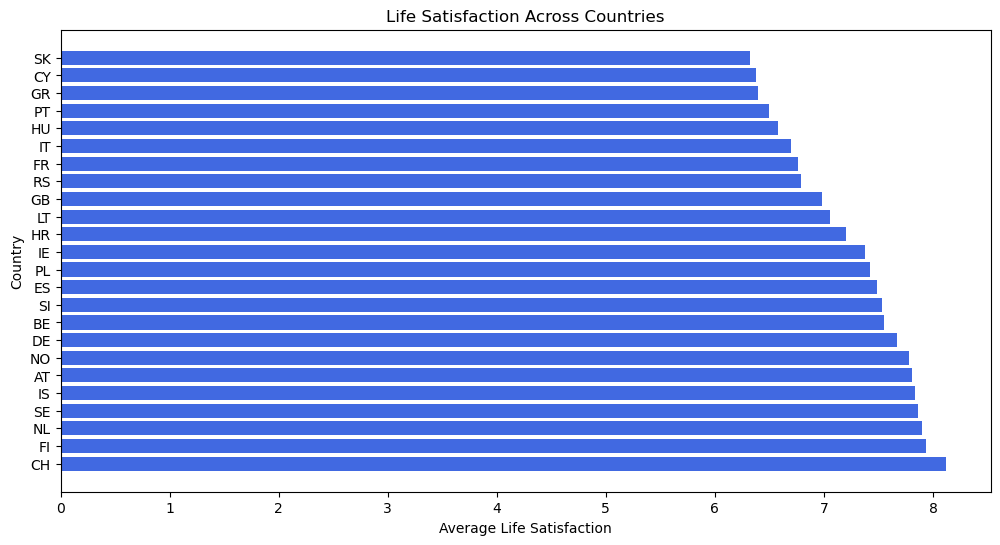

In [65]:
import matplotlib.pyplot as plt

# Sort countries for visualization
country_life_sat_sorted = country_life_sat.sort_values()

# Plot
plt.figure(figsize=(12, 6))
plt.barh(country_life_sat_sorted.index, country_life_sat_sorted, color='royalblue')
plt.xlabel('Average Life Satisfaction')
plt.ylabel('Country')
plt.title('Life Satisfaction Across Countries')
plt.gca().invert_yaxis()  # Highest satisfaction at the top
plt.show()


In [ ]:
# Define regional groupings based on country codes
northern_europe = ['DK', 'EE', 'FI', 'IS', 'LT', 'LV', 'NO', 'SE']
western_europe = ['AT', 'BE', 'CH', 'DE', 'FR', 'GB', 'IE', 'LU', 'NL']
eastern_europe = ['BG', 'CZ', 'HR', 'HU', 'PL', 'RO', 'RS', 'RU', 'SI', 'SK', 'UA']
southern_europe = ['AL', 'CY', 'ES', 'GR', 'IT', 'ME', 'MK', 'PT', 'TR', 'XK']

# Create a dictionary mapping country codes to regions
country_to_region = {}

for country in northern_europe:
    country_to_region[country] = 'Northern Europe'
for country in western_europe:
    country_to_region[country] = 'Western Europe'
for country in eastern_europe:
    country_to_region[country] = 'Eastern Europe'
for country in southern_europe:
    country_to_region[country] = 'Southern Europe'

# Map regions to the dataset
data['region'] = data['cntry'].map(country_to_region)


df_clean


      cntry           region
0        AT   Western Europe
2354     BE   Western Europe
3948     CH   Western Europe
5332     CY  Southern Europe
6017     DE   Western Europe
8437     ES  Southern Europe
10281    FI  Northern Europe
11844    FR   Western Europe
13615    GB   Western Europe
15299    GR  Southern Europe
18056    HR   Eastern Europe
19619    HU   Eastern Europe
21737    IE   Western Europe
23754    IS  Northern Europe
24596    IT  Southern Europe
27461    LT  Northern Europe
28826    NL   Western Europe
30521    NO  Northern Europe
31858    PL   Eastern Europe
33300    PT  Southern Europe
34673    RS   Eastern Europe
36236    SE  Northern Europe
37466    SI   Eastern Europe
38714    SK   Eastern Europe


,stflife,hinctnta,ppltrst,sclmeet,health,eduyrs,uempla,marsts,agea,trstplc,...,iprspota,iplylfra,impenva,imptrada,impfuna,respc19a,symtc19,symtnc19,education_group,age_group
0,8.0,6.0,5.0,4.0,3.0,12.0,0.0,NaN,65.0,10.0,...,2.0,2.0,2.0,3.0,3.0,1.0,2.0,NaN,2.0,4.0
1,9.0,1.0,10.0,7.0,2.0,14.0,0.0,6.0,21.0,4.0,...,4.0,1.0,1.0,4.0,2.0,1.0,2.0,NaN,3.0,1.0
2,10.0,5.0,6.0,4.0,1.0,16.0,0.0,NaN,53.0,8.0,...,3.0,1.0,1.0,3.0,2.0,1.0,2.0,NaN,3.0,3.0
3,7.0,2.0,6.0,6.0,3.0,14.0,0.0,4.0,78.0,9.0,...,3.0,2.0,2.0,2.0,3.0,1.0,2.0,NaN,3.0,5.0
4,9.0,NaN,6.0,5.0,2.0,12.0,0.0,NaN,64.0,8.0,...,2.0,2.0,2.0,2.0,2.0,3.0,NaN,NaN,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39858,5.0,5.0,5.0,6.0,2.0,NaN,0.0,6.0,18.0,10.0,...,4.0,1.0,2.0,1.0,3.0,1.0,2.0,NaN,NaN,1.0
39859,10.0,7.0,7.0,4.0,2.0,14.0,0.0,NaN,56.0,10.0,...,4.0,3.0,2.0,3.0,4.0,3.0,NaN,NaN,3.0,3.0
39860,10.0,10.0,5.0,6.0,2.0,17.0,0.0,NaN,31.0,5.0,...,3.0,2.0,2.0,4.0,3.0,1.0,2.0,NaN,4.0,2.0
39861,8.0,NaN,0.0,7.0,1.0,8.0,0.0,6.0,15.0,2.0,...,3.0,1.0,2.0,1.0,3.0,3.0,NaN,NaN,1.0,1.0


In [68]:
# Group by region and compute the average life satisfaction
region_life_sat = data.groupby('region')['stflife'].mean().sort_values(ascending=False)

# Display the results
print(region_life_sat)


region
Northern Europe    7.687718
Western Europe     7.523132
Eastern Europe     6.934977
Southern Europe    6.710822
Name: stflife, dtype: float64


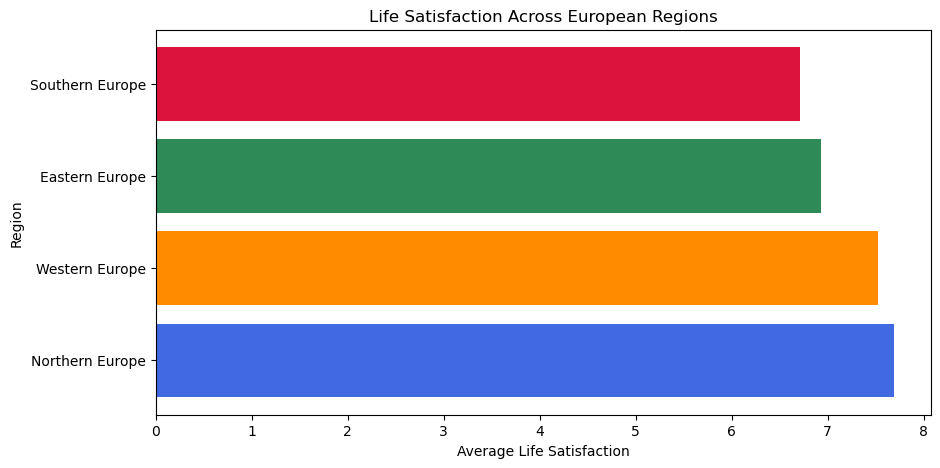

In [ ]:
import matplotlib.pyplot as plt

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.barh(region_life_sat.index, region_life_sat, color=['royalblue', 'darkorange', 'seagreen', 'crimson'])

# Labels
plt.xlabel('Average Life Satisfaction')
plt.ylabel('Region')
plt.title('Life Satisfaction Across European Regions')

# Show plot
plt.show()


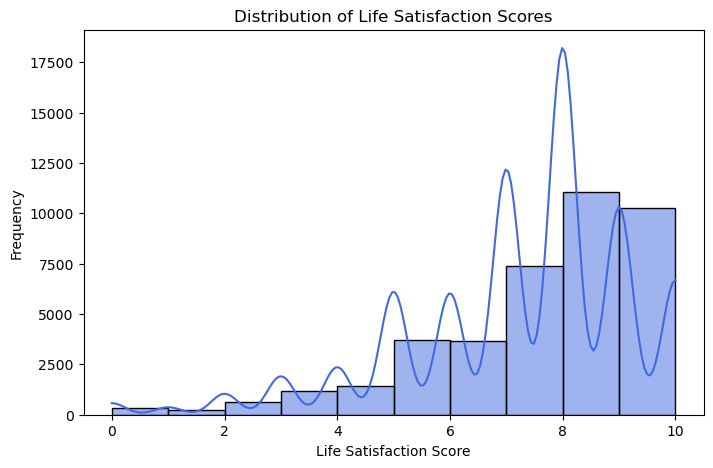

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8,5))
sns.histplot(data['stflife'], bins=10, kde=True, color='royalblue')
plt.xlabel('Life Satisfaction Score')
plt.ylabel('Frequency')
plt.title('Distribution of Life Satisfaction Scores')
plt.show()


In [82]:
# Find respondents with the lowest life satisfaction
low_sat = data[data['stflife'] == data['stflife'].min()]
print("Respondents with the lowest life satisfaction:\n", low_sat)

# Find respondents with the highest life satisfaction
high_sat = data[data['stflife'] == data['stflife'].max()]
print("\nRespondents with the highest life satisfaction:\n", high_sat)


Respondents with the lowest life satisfaction:
       cntry  stflife  hinctnta  ppltrst  sclmeet  health  eduyrs  uempla  \
311      AT      0.0       4.0      0.0      6.0       5    12.0       0   
406      AT      0.0       2.0      0.0      5.0       1    16.0       0   
1007     AT      0.0       9.0      0.0      6.0       5     9.0       1   
1449     AT      0.0       8.0      3.0      5.0       5    11.0       0   
1588     AT      0.0       5.0      0.0      7.0       4    16.0       0   
...     ...      ...       ...      ...      ...     ...     ...     ...   
39268    SK      0.0       NaN      4.0      1.0       4    15.0       0   
39614    SK      0.0       7.0      5.0      6.0       3    13.0       0   
39914    SK      0.0       NaN      6.0      3.0       3    13.0       0   
39976    SK      0.0       1.0      3.0      2.0       5    13.0       0   
40074    SK      0.0       1.0      0.0      7.0       5    12.0       0   

       marsts  agea  ...  ipbhprpa  ipr

In [83]:
# Compute summary statistics for life satisfaction
life_sat_summary = data['stflife'].describe()

# Display the statistics
print(life_sat_summary)


count    39863.000000
mean         7.219652
std          2.010888
min          0.000000
25%          6.000000
50%          8.000000
75%          9.000000
max         10.000000
Name: stflife, dtype: float64


In [92]:
# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

# Compute correlations of all numeric variables with life satisfaction
correlations = numeric_data.corr()['stflife'].sort_values(ascending=False)

# Display the top positive and negative correlations
print("Strongest positive correlations:\n", correlations.head(10))
print("\nStrongest negative correlations:\n", correlations.tail(10))


Strongest positive correlations:
 stflife    1.000000
happy      0.679963
wrhpp      0.407123
ctrlife    0.401551
enjlf      0.391731
stfeco     0.356457
stfdem     0.301528
trstplc    0.278369
pplfair    0.263684
trstlgl    0.263247
Name: stflife, dtype: float64

Strongest negative correlations:
 hmsacld   -0.134867
freehms   -0.150717
aesfdrk   -0.187302
slprl     -0.199544
health    -0.282429
cldgng    -0.291576
flteeff   -0.306797
fltlnl    -0.326955
fltsd     -0.346467
fltdpr    -0.354942
Name: stflife, dtype: float64


In [109]:
# Define low life satisfaction group
low_sat = df_clean[df_clean['stflife'] <= 3]

# Check how many people fall into this category
print("Number of respondents with very low life satisfaction:", low_sat.shape[0])

# Percentage of total dataset
print("Percentage of respondents with very low life satisfaction:", 
      (low_sat.shape[0] / data.shape[0]) * 100)


Number of respondents with very low life satisfaction: 2358
Percentage of respondents with very low life satisfaction: 5.87209881462297


In [111]:
# Compare percentage of low-satisfaction respondents by gender
low_sat_gender = low_sat['gndr'].value_counts(normalize=True) * 100
print("Percentage of low satisfaction by gender:\n", low_sat_gender)


Percentage of low satisfaction by gender:
 gndr
2.0    54.834606
1.0    45.165394
Name: proportion, dtype: float64


In [97]:
df_clean = pd.read_csv('../data/year_2023_cleaned.csv')

Percentage of low satisfaction by age group:
 age_group
3.0    28.571429
4.0    28.319328
2.0    18.151261
5.0    15.210084
1.0     9.747899
Name: proportion, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_5344\3302413064.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




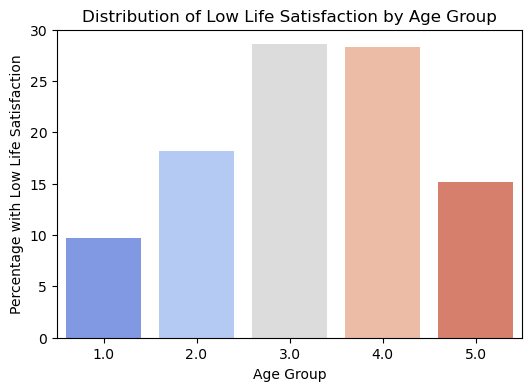

In [102]:
# Compare percentage of low-satisfaction respondents by age group
low_sat_age = low_sat['age_group'].value_counts(normalize=True) * 100
print("Percentage of low satisfaction by age group:\n", low_sat_age)

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=low_sat_age.index, y=low_sat_age.values, palette='coolwarm')
plt.xlabel("Age Group")
plt.ylabel("Percentage with Low Life Satisfaction")
plt.title("Distribution of Low Life Satisfaction by Age Group")
plt.show()


In [89]:
# Compute correlations of all numeric variables with life satisfaction
correlations = cleaned_data.corr()['stflife'].sort_values(ascending=False)

# Display the top positive and negative correlations
print("Strongest positive correlations:\n", correlations.head(10))
print("\nStrongest negative correlations:\n", correlations.tail(10))


NameError: name 'cleaned_data' is not defined

<Figure size 800x500 with 0 Axes>

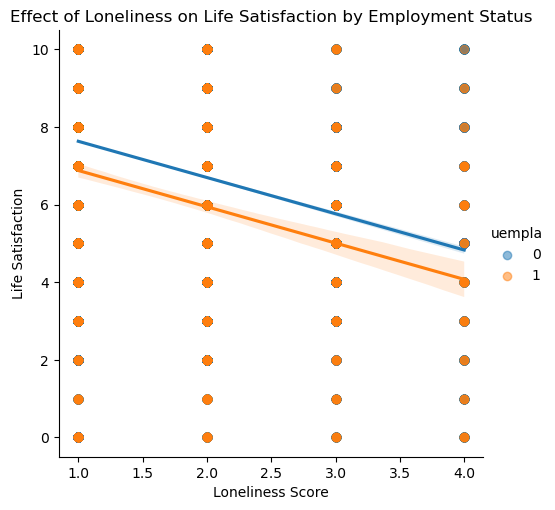

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot with a regression line
plt.figure(figsize=(8,5))
sns.lmplot(data=data, x='fltlnl', y='stflife', hue='uempla', scatter_kws={'alpha':0.5})

# Labels
plt.xlabel("Loneliness Score")
plt.ylabel("Life Satisfaction")
plt.title("Effect of Loneliness on Life Satisfaction by Employment Status")
plt.show()


In [84]:
# Count the frequency of each life satisfaction score
life_sat_counts = data['stflife'].value_counts().sort_index()

# Display the most common scores
print("Most common life satisfaction scores:\n", life_sat_counts)


Most common life satisfaction scores:
 stflife
0.0       347
1.0       224
2.0       630
3.0      1157
4.0      1431
5.0      3704
6.0      3656
7.0      7386
8.0     11040
9.0      6240
10.0     4048
Name: count, dtype: int64


In [86]:
# Filter respondents with very low life satisfaction (0-2)
low_sat_respondents = data[data['stflife'] <= 2]

# Display their demographic breakdown
print(low_sat_respondents.groupby('uempla')['stflife'].count())
print(low_sat_respondents.groupby('eduyrs')['stflife'].count())
print(low_sat_respondents.groupby('region')['stflife'].count())


uempla
0    1111
1      90
Name: stflife, dtype: int64
eduyrs
1.0       6
2.0       5
3.0      11
4.0      32
5.0      33
6.0      33
7.0      11
8.0      99
9.0      84
10.0     64
11.0    121
12.0    250
13.0     97
14.0     82
15.0     59
16.0     72
17.0     37
18.0     30
19.0     12
20.0     18
21.0      4
22.0      7
23.0      2
24.0      1
25.0      2
27.0      1
28.0      1
29.0      1
31.0      2
40.0      1
45.0      1
Name: stflife, dtype: int64
region
Eastern Europe     371
Northern Europe    115
Southern Europe    369
Western Europe     346
Name: stflife, dtype: int64


In [72]:
# Check if there are any NaN values in stflife
print("Missing values in life satisfaction column:", data['stflife'].isna().sum())

# Check if any regions have no data
print("Number of records per region:\n", data.groupby('region')['stflife'].count())

# Check data types
# print("Data types in dataset:\n", data.dtypes)


Missing values in life satisfaction column: 293
Number of records per region:
 region
Eastern Europe      9289
Northern Europe     6302
Southern Europe     9444
Western Europe     14828
Name: stflife, dtype: int64


In [73]:
# Drop rows where life satisfaction is NaN
data_cleaned = data.dropna(subset=['stflife'])

# Check if missing values are removed
print("Missing values after cleaning:", data_cleaned['stflife'].isna().sum())

import scipy.stats as stats

# Extract life satisfaction scores per region (after cleaning)
northern_values = data_cleaned[data_cleaned['region'] == 'Northern Europe']['stflife']
western_values = data_cleaned[data_cleaned['region'] == 'Western Europe']['stflife']
eastern_values = data_cleaned[data_cleaned['region'] == 'Eastern Europe']['stflife']
southern_values = data_cleaned[data_cleaned['region'] == 'Southern Europe']['stflife']

# Run ANOVA test
anova_result = stats.f_oneway(northern_values, western_values, eastern_values, southern_values)

# Display results
print("ANOVA Test Results:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


Missing values after cleaning: 0
ANOVA Test Results:
F-statistic: 508.7284177901082
p-value: 0.0


In [78]:
!pip install statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create a list of all life satisfaction scores with corresponding regions
region_labels = data_cleaned['region']
life_sat_scores = data_cleaned['stflife']

# Perform Tukey HSD test
tukey_result = pairwise_tukeyhsd(life_sat_scores, region_labels)

# Display results
print(tukey_result)

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.9 MB 7.2 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 8.0 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.9 MB 6.1 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 6.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 7.4 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 7.3 MB/s eta 0:00:00
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
 Eastern Europe Northern Europe   0.7527   0.0    0.67  0.8355   True
 Eastern Europe Southern Europe  -0.2242   0.0 -0.2982 -0.1501   True
 Eastern Europe  Western Europe   0.5882   0.0  0

In [79]:
print(tukey_result)

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
     group1          group2     meandiff p-adj  lower   upper  reject
---------------------------------------------------------------------
 Eastern Europe Northern Europe   0.7527   0.0    0.67  0.8355   True
 Eastern Europe Southern Europe  -0.2242   0.0 -0.2982 -0.1501   True
 Eastern Europe  Western Europe   0.5882   0.0  0.5211  0.6552   True
Northern Europe Southern Europe  -0.9769   0.0 -1.0594 -0.8944   True
Northern Europe  Western Europe  -0.1646   0.0 -0.2408 -0.0883   True
Southern Europe  Western Europe   0.8123   0.0  0.7456  0.8791   True
---------------------------------------------------------------------


C:\Users\User\AppData\Local\Temp\ipykernel_5344\3078933230.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




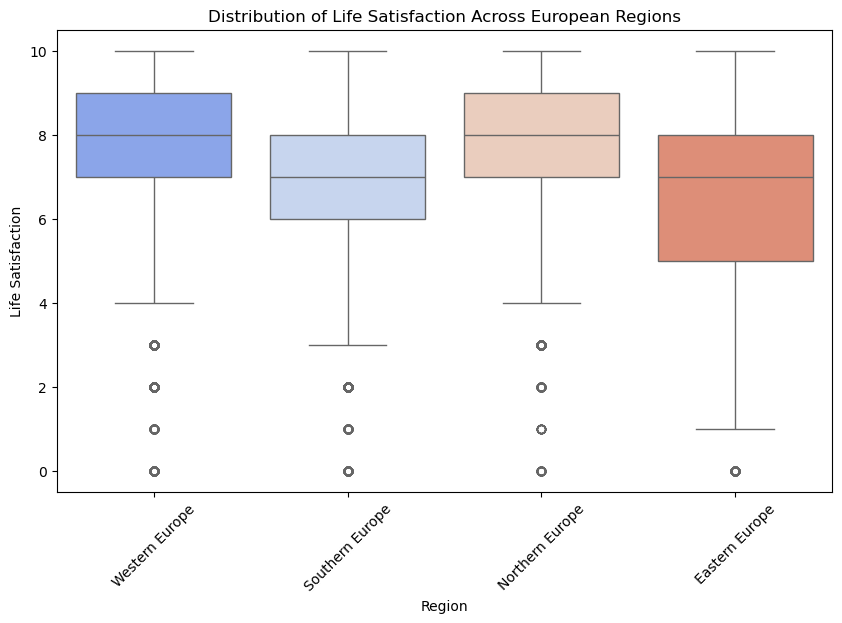

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='stflife', data=data_cleaned, palette='coolwarm')

# Labels
plt.xlabel('Region')
plt.ylabel('Life Satisfaction')
plt.title('Distribution of Life Satisfaction Across European Regions')

# Show plot
plt.xticks(rotation=45)  # Rotate region labels for better readability
plt.show()


In [44]:
import plotly.express as px
import pandas as pd

# Assuming 'trans_df' is your DataFrame
vmin, vmax = -0.7, 0.7

plot_df = trans_df.reset_index()
plot_df = plot_df.melt(id_vars='index', var_name='Variable', value_name='Correlation')
plot_df.rename(columns={'index': 'Country'}, inplace=True)

fig = px.imshow(
    trans_df,
    labels=dict(x="Variable", y="Country", color="Correlation"),
    x=trans_df.columns,
    y=trans_df.index,
    zmin=vmin, zmax=vmax,
    color_continuous_scale='RdBu_r'
)

fig.update_layout(
    title='Correlation of Various Factors with Life Satisfaction Across Countries',
    title_x=0.5,
    width=1400, height=1000,
    xaxis={'side': 'bottom'},
    xaxis_title='Variables',
    yaxis_title='Countries',
    coloraxis_colorbar=dict(
        title='Correlation Coeff.',
        ticks='outside',
        tickvals=[vmin, 0, vmax]
    ),
    margin=dict(l=200, r=50, t=100, b=100)
)

fig.update_xaxes(tickangle=90, tickfont=dict(family='Rockwell', size=10, color='blue'))
fig.update_yaxes(tickangle=0, tickfont=dict(family='Rockwell', size=10, color='blue'))

fig.show()

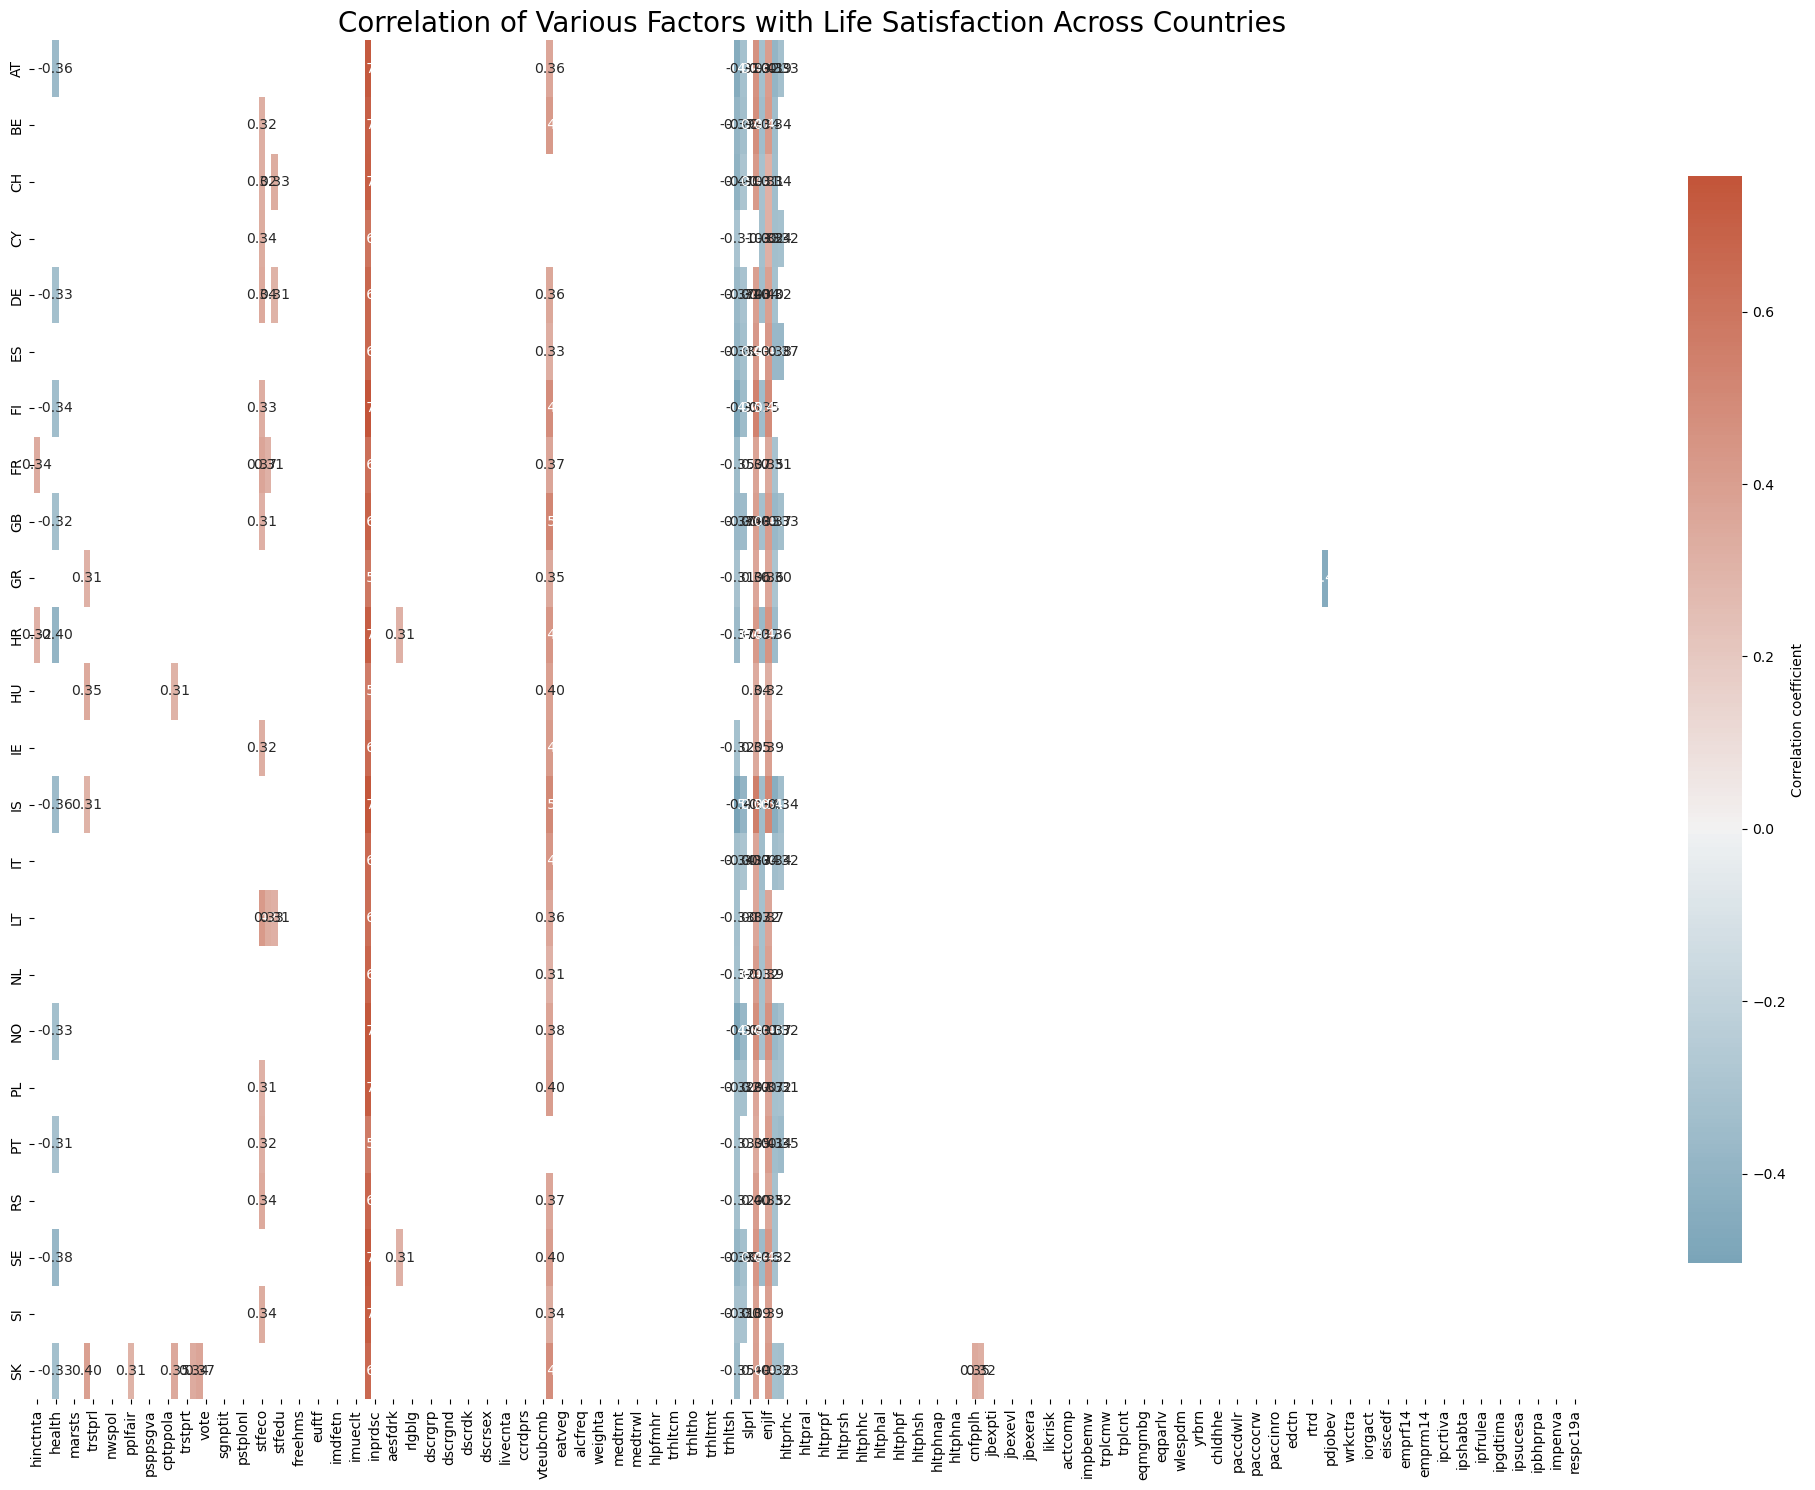

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'trans_df' is your DataFrame
plt.figure(figsize=(20, 15))

# Enhance color contrast
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Focus on significant correlations
threshold = 0.3
significant = np.abs(trans_df) >= threshold

sns.heatmap(trans_df, mask=~significant, annot=True, fmt=".2f", cmap=cmap, center=0,
            cbar_kws={"shrink": .8, 'label': 'Correlation coefficient'})
plt.title('Correlation of Various Factors with Life Satisfaction Across Countries', fontsize=20)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [155]:
with open('country_correlation_results.json', 'w') as json_file:
    json.dump(correlation_df, json_file, indent=4)

# Display the correlation dictionary
correlation_df

{'AT': {'hinctnta': 0.224466857404751,
  'ppltrst': 0.2643408239848503,
  'sclmeet': 0.07838978633277369,
  'health': -0.36215205216617,
  'eduyrs': 0.058171070016499724,
  'uempla': -0.09416928763430256,
  'marsts': -0.0019966838115676416,
  'agea': -0.0013685648783290979,
  'trstplc': 0.21841962984036717,
  'trstprl': 0.1753591449292576,
  'rlgdgr': 0.03102800475875374,
  'wkhtot': -0.023955805155197636,
  'nwspol': 0.0008553323578157032,
  'netusoft': 0.11351214884500328,
  'netustm': -0.05221937737535132,
  'pplfair': 0.24705852780431375,
  'pplhlp': 0.2543881468374597,
  'polintr': -0.03824417038594292,
  'psppsgva': 0.14741642030325972,
  'actrolga': 0.06402885518360915,
  'psppipla': 0.14398623937477248,
  'cptppola': 0.04892559878550184,
  'trstlgl': 0.18068115176090166,
  'trstplt': 0.1749810471514261,
  'trstprt': 0.16551557745447068,
  'trstep': 0.1723438886266485,
  'trstun': 0.12200310420967826,
  'vote': -0.08301831236793072,
  'contplt': -0.04173331372585123,
  'donprty'

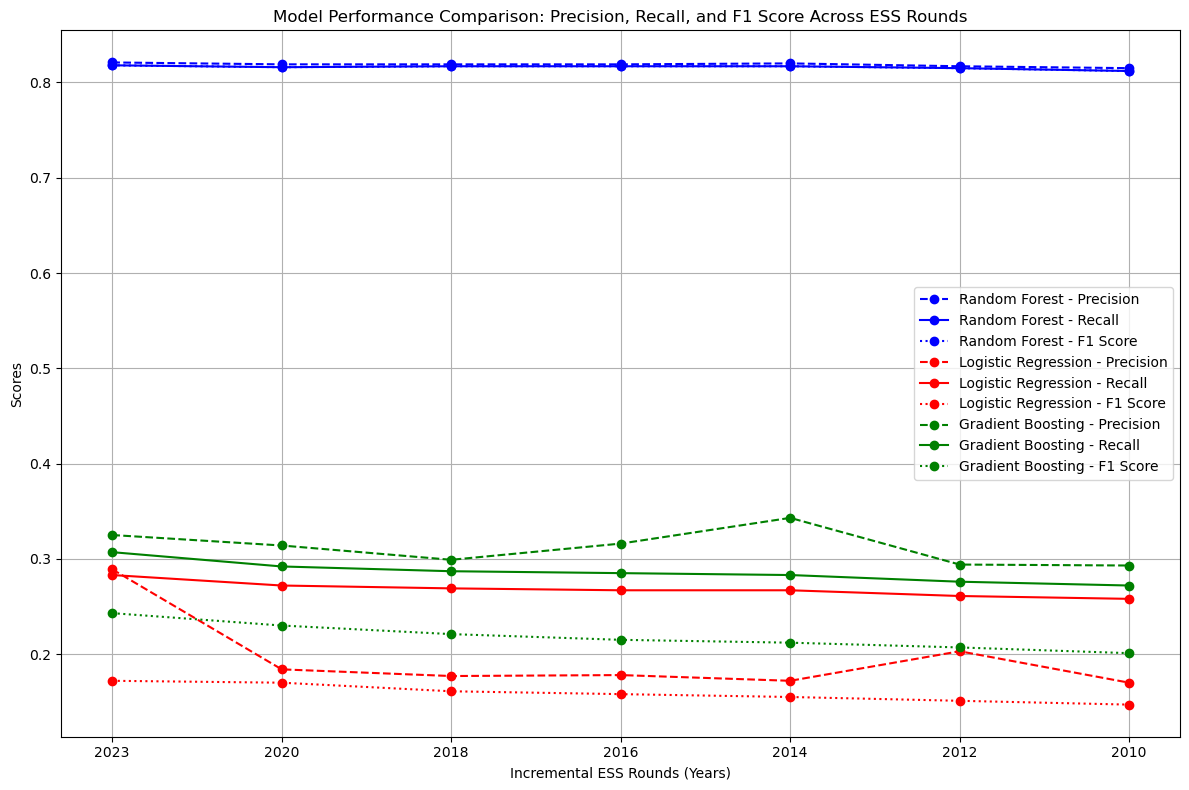

In [3]:
import matplotlib.pyplot as plt
# Data for Precision, Recall, and F1 scores across the ESS rounds (for all models)
precision_rf = [  0.821, 0.819, 0.819, 0.819, 0.820, 0.817,0.815]  # Random Forest precision
recall_rf = [ 0.818, 0.816, 0.817, 0.817, 0.817, 0.815,0.812]  # Random Forest recall
f1_rf = [ 0.818 , 0.816, 0.817, 0.817, 0.817, 0.815, 0.812]  # Random Forest F1 score

precision_logistic = [0.289, 0.184, 0.177, 0.178, 0.172, 0.203, 0.170]  # Logistic Regression precision
recall_logistic = [0.283, 0.272, 0.269, 0.267, 0.267, 0.261,0.258]  # Logistic Regression recall
f1_logistic = [0.172, 0.170, 0.161, 0.158, 0.155, 0.151,0.147]  # Logistic Regression F1 score

precision_gb = [0.325, 0.314, 0.299, 0.316, 0.343, 0.294,0.293]  # Gradient Boosting precision
recall_gb = [0.307, 0.292, 0.287, 0.285, 0.283, 0.276,0.272]  # Gradient Boosting recall
f1_gb = [0.243, 0.230, 0.221, 0.215, 0.212, 0.207,0.201]  # Gradient Boosting F1 score

# Years for the X-axis
years_combined = ['2023', '2020', '2018', '2016', '2014', '2012', "2010"]

# Plotting Precision, Recall, and F1 Score for each model on the same graph
plt.figure(figsize=(12, 8))

# Plotting Precision, Recall, and F1 for Random Forest
plt.plot(years_combined, precision_rf, label="Random Forest - Precision", marker='o', color='blue', linestyle='--')
plt.plot(years_combined, recall_rf, label="Random Forest - Recall", marker='o', color='blue')
plt.plot(years_combined, f1_rf, label="Random Forest - F1 Score", marker='o', color='blue', linestyle=':')

# Plotting Precision, Recall, and F1 for Logistic Regression
plt.plot(years_combined, precision_logistic, label="Logistic Regression - Precision", marker='o', color='red', linestyle='--')
plt.plot(years_combined, recall_logistic, label="Logistic Regression - Recall", marker='o', color='red')
plt.plot(years_combined, f1_logistic, label="Logistic Regression - F1 Score", marker='o', color='red', linestyle=':')

# Plotting Precision, Recall, and F1 for Gradient Boosting
plt.plot(years_combined, precision_gb, label="Gradient Boosting - Precision", marker='o', color='green', linestyle='--')
plt.plot(years_combined, recall_gb, label="Gradient Boosting - Recall", marker='o', color='green')
plt.plot(years_combined, f1_gb, label="Gradient Boosting - F1 Score", marker='o', color='green', linestyle=':')

# Adding titles and labels
plt.title("Model Performance Comparison: Precision, Recall, and F1 Score Across ESS Rounds")
plt.xlabel("Incremental ESS Rounds (Years)")
plt.ylabel("Scores")
plt.legend()

# Adding grid for better visibility
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


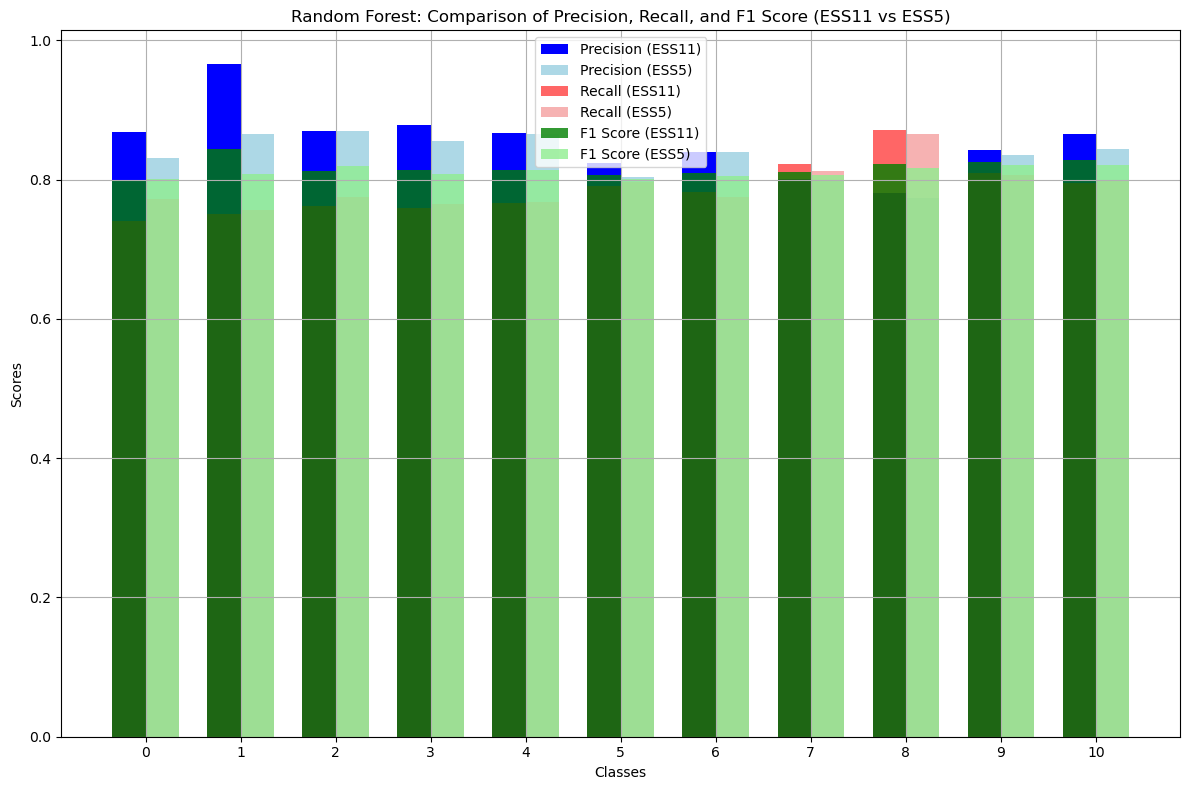

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison between ESS11 (First Round) and ESS5 (Last Round)
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
precision_ess11 = [0.868, 0.966, 0.870, 0.878, 0.867, 0.824, 0.840, 0.801, 0.781, 0.842, 0.865]
recall_ess11 = [0.741, 0.750, 0.762, 0.759, 0.767, 0.791, 0.782, 0.822, 0.871, 0.809, 0.795]
f1_ess11 = [0.799, 0.844, 0.812, 0.814, 0.814, 0.807, 0.810, 0.811, 0.823, 0.825, 0.828]

precision_ess5 = [0.831, 0.865, 0.870, 0.856, 0.866, 0.804, 0.839, 0.799, 0.773, 0.836, 0.844]
recall_ess5 = [0.772, 0.757, 0.775, 0.765, 0.768, 0.797, 0.775, 0.812, 0.866, 0.806, 0.799]
f1_ess5 = [0.801, 0.808, 0.820, 0.808, 0.814, 0.801, 0.805, 0.806, 0.817, 0.821, 0.821]

# Plotting side-by-side bar charts for Precision, Recall, and F1 Score comparison between ESS11 and ESS5
bar_width = 0.35
index = np.arange(len(classes))

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot precision, recall, and F1 score for both ESS11 and ESS5
bar1 = ax.bar(index, precision_ess11, bar_width, label="Precision (ESS11)", color='blue')
bar2 = ax.bar(index + bar_width, precision_ess5, bar_width, label="Precision (ESS5)", color='lightblue')

bar3 = ax.bar(index, recall_ess11, bar_width, label="Recall (ESS11)", color='red', alpha=0.6)
bar4 = ax.bar(index + bar_width, recall_ess5, bar_width, label="Recall (ESS5)", color='lightcoral', alpha=0.6)

bar5 = ax.bar(index, f1_ess11, bar_width, label="F1 Score (ESS11)", color='green', alpha=0.8)
bar6 = ax.bar(index + bar_width, f1_ess5, bar_width, label="F1 Score (ESS5)", color='lightgreen', alpha=0.8)

# Adding titles and labels
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Random Forest: Comparison of Precision, Recall, and F1 Score (ESS11 vs ESS5)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels([str(i) for i in classes])
ax.legend()

# Adding grid for better visibility
ax.grid(True)

# Display the plot
plt.tight_layout()
plt.show()
